In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import warnings
import pickle
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'East Godavari']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,...,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,Crop
612,731,17.44,81.92,East Godavari,Gangavaram,Gangavaram,Red Soils,5.72,0.05,0.24,...,128.0,890.0,245.0,3.75,0.35,0.43,13.30,1.28,48.43,Topioca
613,732,17.44,81.92,East Godavari,Gangavaram,Gangavaram,Red Soils,5.45,0.06,0.32,...,105.0,727.0,169.0,4.15,0.57,0.49,16.71,1.54,61.84,"Topioca, Cashew"
614,734,17.43,81.92,East Godavari,Gangavaram,Gangavaram,Red Soils,5.93,0.08,0.39,...,77.0,734.0,169.0,7.12,0.47,0.51,24.27,1.72,47.76,Paddy
615,735,17.42,81.91,East Godavari,Gangavaram,Gangavaram,Red Soils,5.33,0.08,0.58,...,87.0,527.0,133.0,12.00,1.47,0.35,84.06,2.40,33.52,Paddy
616,737,17.42,81.91,East Godavari,Gangavaram,Gangavaram,Red Soils,6.95,0.05,0.23,...,57.0,1132.0,479.0,2.14,0.47,0.42,13.43,1.69,32.92,"Topica, Paddy"


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,6.226818,0.209773,0.482273,12.031591,157.500000,953.750000,206.409091,9.929091,0.894091,0.422955,37.901591,1.845909,36.977727
std,0.746171,0.495681,0.217286,18.528432,70.436348,753.495208,153.266346,11.099844,0.581147,0.166616,32.566430,0.899215,19.727601
min,4.820000,0.040000,0.080000,0.740000,57.000000,223.000000,33.000000,1.040000,0.320000,0.170000,5.050000,0.500000,5.090000
25%,5.767500,0.060000,0.357500,2.415000,106.500000,578.750000,126.750000,3.585000,0.550000,0.290000,13.397500,1.180000,22.590000
50%,6.130000,0.090000,0.455000,4.915000,148.000000,753.500000,155.500000,5.695000,0.685000,0.420000,26.960000,1.705000,33.730000
75%,6.672500,0.170000,0.580000,9.970000,188.000000,982.500000,245.500000,11.355000,0.972500,0.520000,50.015000,2.455000,47.927500
max,8.000000,3.350000,1.180000,82.510000,392.000000,3794.000000,777.000000,56.310000,3.010000,0.810000,121.720000,4.410000,87.300000


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Red Soils', 'Red sandy loam'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace('Red Soils', 'Red Soil')
df['SoilType'] = df['SoilType'].replace('Red sandy loam', 'Red Sandy Loam Soil')
df.SoilType.unique()

array(['Red Soil', 'Red Sandy Loam Soil'], dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Red Soil': 31, 'Red Sandy Loam Soil': 13}

<BarContainer object of 2 artists>

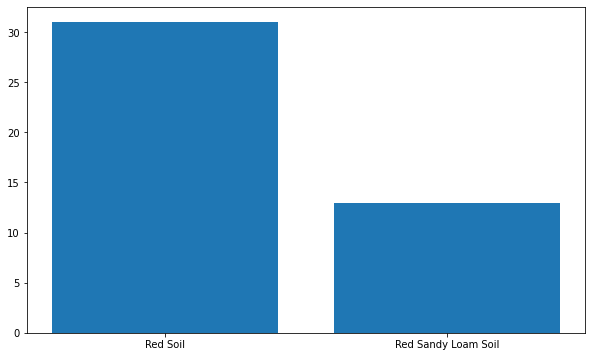

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Topioca  ', 'Topioca, Cashew', 'Paddy', 'Topica, Paddy',
       'Topioca', 'Cashew, Mango', 'Topioca (Sample-2)',
       'Topioca (Sample-1)', 'Paddy (Sample-2)', 'Cotton (Sample-1)',
       'Cotton ', 'Cotton', 'Cotton, Topioca', 'Paddy, Brinjal',
       'Cotton, Redgram', 'Paddy (Sample-1)'], dtype=object)

In [14]:
df['Crop'].value_counts()

Paddy                 21
Cotton                 4
Topioca                4
Paddy (Sample-2)       2
Cotton (Sample-1)      2
Cotton, Topioca        1
Topica, Paddy          1
Topioca (Sample-1)     1
Paddy, Brinjal         1
Cashew, Mango          1
Cotton                 1
Topioca, Cashew        1
Topioca                1
Cotton, Redgram        1
Paddy (Sample-1)       1
Topioca (Sample-2)     1
Name: Crop, dtype: int64

Paddy      25
Cotton      8
Tapioca     8
Name: Crop, dtype: int64


<BarContainer object of 3 artists>

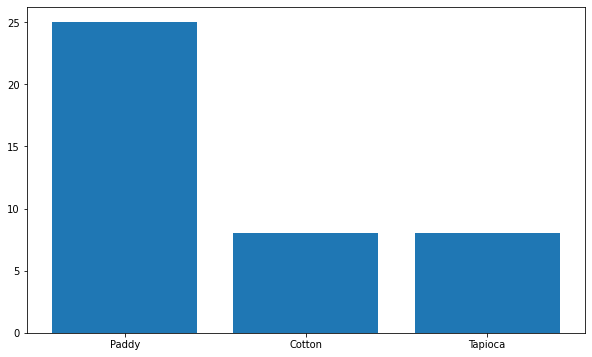

In [15]:
df['Crop'] = df['Crop'].replace(['Cotton (Sample-1)', 'Cotton ', 'Cotton', 'Cotton, Redgram'], 'Cotton')
df['Crop'] = df['Crop'].replace(['Paddy, Brinjal', 'Paddy (Sample-1)', 'Paddy (Sample-2)'], 'Paddy')
df['Crop'] = df['Crop'].replace(['Topioca', 'Topioca, Cashew', 'Topioca  ', 'Topioca (Sample-2)', 'Topioca (Sample-1)'], 'Tapioca')
df = df[(df['Crop'] != 'Topica, Paddy') & (df['Crop'] != 'Cashew, Mango') & (df['Crop'] != 'Cotton, Topioca')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
df = df[(df["Crop"] != 'SweetCorn') & (df["Crop"] != 'Mango') & (df["Crop"] != 'HorseGram')]

In [17]:
# Getting rid of features that have a high correlation among one another

In [18]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn
pH,1.000000,0.350693,0.241096,0.127105,0.148829,0.695071,0.591943,0.188963,0.042814,0.043501,-0.141149,0.161902,-0.556459
EC,0.350693,1.000000,0.564192,0.163832,0.433282,0.563984,0.397651,0.758502,0.222021,0.528984,-0.033599,0.214563,-0.015411
OC,0.241096,0.564192,1.000000,0.296454,0.379856,0.282452,0.266818,0.508410,0.518181,0.539134,0.427353,0.611589,-0.016304
P,0.127105,0.163832,0.296454,1.000000,0.236829,0.020361,0.018558,-0.066209,0.878455,0.076579,0.663295,0.462322,-0.154802
K,0.148829,0.433282,0.379856,0.236829,1.000000,0.112563,0.267932,0.095924,0.260360,0.464705,-0.060808,-0.074361,0.070945
Ca,0.695071,0.563984,0.282452,0.020361,0.112563,1.000000,0.766683,0.346891,-0.021570,0.273129,-0.143852,0.181346,-0.369081
Mg,0.591943,0.397651,0.266818,0.018558,0.267932,0.766683,1.000000,0.201328,0.075967,0.373499,-0.086178,0.273140,-0.210540
S,0.188963,0.758502,0.508410,-0.066209,0.095924,0.346891,0.201328,1.000000,0.042084,0.389747,0.068553,0.338286,-0.088672
Zn,0.042814,0.222021,0.518181,0.878455,0.260360,-0.021570,0.075967,0.042084,1.000000,0.185091,0.819179,0.623415,-0.016939
B,0.043501,0.528984,0.539134,0.076579,0.464705,0.273129,0.373499,0.389747,0.185091,1.000000,0.081734,0.277509,0.175012


In [19]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns to be dropped :  ['OC', 'Ca', 'Mg', 'S', 'Zn', 'B', 'Fe', 'Cu']
Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'P', 'K', 'Mn', 'Crop']


In [20]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

       pH    EC     P      K     Mn  Red Sandy Loam Soil  Red Soil
612  5.72  0.05  1.24  128.0  48.43                    0         1
612    Tapioca
Name: Crop, dtype: object


In [22]:
# Standardizing the independent variables using Feature Scaling
sc = StandardScaler()
X[:, 0:5] = sc.fit_transform(X[:, 0:5])

In [23]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# SMOTE: Synthetic Minority Over-sampling Technique

In [24]:
# Separating the dependent and independent variables
df = df.drop(['SoilType'], axis=1)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
smote = SMOTE()
X, y = smote.fit_resample(X, y)

In [25]:
# Standardizing the independent variables using Feature Scaling
sc2 = StandardScaler()
X[:, :] = sc2.fit_transform(X[:, :])

In [26]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [27]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [28]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [29]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.5789473684210527


In [30]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 63.00 %
Standard Deviation: 18.35 %


# Decision Tree Classifier

In [31]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [32]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [33]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7368421052631579


In [34]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 54.00 %
Standard Deviation: 17.18 %


# Random Forest Classifier

In [51]:
clf3_3 = RandomForestClassifier(random_state=0)
clf3_3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [52]:
y_test_pred = clf3_3.predict(X_test)
y_train_pred = clf3_3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [53]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7894736842105263


In [54]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3_3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 58.00 %
Standard Deviation: 20.93 %


In [39]:
pickle.dump(clf3_3, open('EG_model.pkl', 'wb'))
pickle.dump(sc2, open('EG_scaler.pkl', 'wb'))

# XGBoost

In [55]:
clf4_4 = HistGradientBoostingClassifier(random_state=0)
clf4_4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [56]:
y_test_pred = clf4_4.predict(X_test)
y_train_pred = clf4_4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [57]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  0.8392857142857143
Testing Accuracy:  0.6842105263157895


In [58]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4_4, X = X_train, y = y_train, cv = 10)

In [59]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 66.67 %
Standard Deviation: 14.98 %


In [45]:
# pickle.dump(clf4_4, open('Anantapur_model.pkl', 'wb'))
# pickle.dump(sc2, open('Anantapur_scaler.pkl', 'wb'))

# Multi-layer Perceptron Classifier

In [60]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [61]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [62]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.875
Testing Accuracy:  0.7368421052631579


In [63]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 65.00 %
Standard Deviation: 16.55 %


# Catboost

In [64]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 1.0874306	total: 441us	remaining: 43.7ms
1:	learn: 0.9591949	total: 918us	remaining: 45ms
2:	learn: 0.8656124	total: 1.25ms	remaining: 40.3ms
3:	learn: 0.8260768	total: 1.57ms	remaining: 37.8ms
4:	learn: 0.8105349	total: 1.9ms	remaining: 36.2ms
5:	learn: 0.7277546	total: 2.24ms	remaining: 35ms
6:	learn: 0.6602330	total: 2.55ms	remaining: 33.9ms
7:	learn: 0.5939066	total: 2.88ms	remaining: 33.1ms
8:	learn: 0.5630409	total: 3.22ms	remaining: 32.5ms
9:	learn: 0.4645555	total: 3.51ms	remaining: 31.6ms
10:	learn: 0.4290779	total: 3.82ms	remaining: 30.9ms
11:	learn: 0.4052991	total: 4.19ms	remaining: 30.8ms
12:	learn: 0.3877378	total: 4.5ms	remaining: 30.1ms
13:	learn: 0.3698915	total: 4.81ms	remaining: 29.6ms
14:	learn: 0.3559515	total: 5.14ms	remaining: 29.1ms
15:	learn: 0.3255339	total: 5.47ms	remaining: 28.7ms
16:	learn: 0.2930175	total: 5.82ms	remaining: 28.4ms
17:	learn: 0.2727805	total: 6.13ms	remaining: 27.9ms
18:	learn: 0.2702338	total: 6.46ms	remaining: 27.5ms
19:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 1.098359433
bestIteration = 0

Training on fold [1/5]

bestTest = 0.8811575499
bestIteration = 93

Training on fold [2/5]

bestTest = 0.9220439971
bestIteration = 99

Training on fold [3/5]

bestTest = 1.005946906
bestIteration = 97

Training on fold [4/5]

bestTest = 0.9308425516
bestIteration = 98



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0930219	test: 1.0952726	best: 1.0952726 (0)	total: 696us	remaining: 696ms
1:	learn: 1.0882081	test: 1.0917023	best: 1.0917023 (1)	total: 12.9ms	remaining: 6.41s
2:	learn: 1.0824507	test: 1.0895209	best: 1.0895209 (2)	total: 13.5ms	remaining: 4.47s
3:	learn: 1.0765304	test: 1.0851985	best: 1.0851985 (3)	total: 13.9ms	remaining: 3.47s
4:	learn: 1.0712833	test: 1.0822428	best: 1.0822428 (4)	total: 14.4ms	remaining: 2.87s
5:	learn: 1.0680171	test: 1.0821043	best: 1.0821043 (5)	total: 15.3ms	remaining: 2.53s
6:	learn: 1.0603667	test: 1.0778690	best: 1.0778690 (6)	total: 15.8ms	remaining: 2.24s
7:	learn: 1.0535549	test: 1.0744934	best: 1.0744934 (7)	total: 16.3ms	remaining: 2.02s
8:	learn: 1.0463702	test: 1.0713331	best: 1.0713331 (8)	total: 16.8ms	remaining: 1.84s
9:	learn: 1.0398440	test: 1.0666721	best: 1.0666721 (9)	total: 17.2ms	remaining: 1.71s
10:	learn: 1.0327802	test: 1.0627368	best: 1.0627368 (10)	total: 17.7ms	remaining: 1.59s
11:	learn: 1.0266871	test: 1.0601089	best:

225:	learn: 0.4196467	test: 0.6796400	best: 0.6796400 (225)	total: 116ms	remaining: 398ms
226:	learn: 0.4174113	test: 0.6781927	best: 0.6781927 (226)	total: 117ms	remaining: 398ms
227:	learn: 0.4163111	test: 0.6776921	best: 0.6776921 (227)	total: 118ms	remaining: 398ms
228:	learn: 0.4141267	test: 0.6767047	best: 0.6767047 (228)	total: 118ms	remaining: 398ms
229:	learn: 0.4116251	test: 0.6733670	best: 0.6733670 (229)	total: 119ms	remaining: 397ms
230:	learn: 0.4103192	test: 0.6731446	best: 0.6731446 (230)	total: 119ms	remaining: 397ms
231:	learn: 0.4082759	test: 0.6698909	best: 0.6698909 (231)	total: 120ms	remaining: 396ms
232:	learn: 0.4054305	test: 0.6688583	best: 0.6688583 (232)	total: 120ms	remaining: 395ms
233:	learn: 0.4037480	test: 0.6686081	best: 0.6686081 (233)	total: 120ms	remaining: 394ms
234:	learn: 0.4021410	test: 0.6678379	best: 0.6678379 (234)	total: 121ms	remaining: 393ms
235:	learn: 0.3997501	test: 0.6673358	best: 0.6673358 (235)	total: 121ms	remaining: 392ms
236:	learn

388:	learn: 0.2345785	test: 0.5752776	best: 0.5752776 (388)	total: 197ms	remaining: 309ms
389:	learn: 0.2338986	test: 0.5751794	best: 0.5751794 (389)	total: 197ms	remaining: 309ms
390:	learn: 0.2331421	test: 0.5751418	best: 0.5751418 (390)	total: 198ms	remaining: 308ms
391:	learn: 0.2324088	test: 0.5733959	best: 0.5733959 (391)	total: 199ms	remaining: 308ms
392:	learn: 0.2315917	test: 0.5722418	best: 0.5722418 (392)	total: 199ms	remaining: 307ms
393:	learn: 0.2307476	test: 0.5701005	best: 0.5701005 (393)	total: 199ms	remaining: 307ms
394:	learn: 0.2300543	test: 0.5690044	best: 0.5690044 (394)	total: 200ms	remaining: 306ms
395:	learn: 0.2292214	test: 0.5692841	best: 0.5690044 (394)	total: 200ms	remaining: 306ms
396:	learn: 0.2285712	test: 0.5689643	best: 0.5689643 (396)	total: 201ms	remaining: 305ms
397:	learn: 0.2276868	test: 0.5660280	best: 0.5660280 (397)	total: 201ms	remaining: 305ms
398:	learn: 0.2269001	test: 0.5666008	best: 0.5660280 (397)	total: 202ms	remaining: 304ms
399:	learn

566:	learn: 0.1481675	test: 0.5121896	best: 0.5121467 (565)	total: 278ms	remaining: 212ms
567:	learn: 0.1478689	test: 0.5118993	best: 0.5118993 (567)	total: 278ms	remaining: 212ms
568:	learn: 0.1474918	test: 0.5112346	best: 0.5112346 (568)	total: 279ms	remaining: 211ms
569:	learn: 0.1470614	test: 0.5110789	best: 0.5110789 (569)	total: 280ms	remaining: 211ms
570:	learn: 0.1467661	test: 0.5105711	best: 0.5105711 (570)	total: 280ms	remaining: 210ms
571:	learn: 0.1465323	test: 0.5106651	best: 0.5105711 (570)	total: 281ms	remaining: 210ms
572:	learn: 0.1461079	test: 0.5111207	best: 0.5105711 (570)	total: 281ms	remaining: 209ms
573:	learn: 0.1457511	test: 0.5103488	best: 0.5103488 (573)	total: 282ms	remaining: 209ms
574:	learn: 0.1453472	test: 0.5102231	best: 0.5102231 (574)	total: 282ms	remaining: 208ms
575:	learn: 0.1450173	test: 0.5099649	best: 0.5099649 (575)	total: 282ms	remaining: 208ms
576:	learn: 0.1448013	test: 0.5102823	best: 0.5099649 (575)	total: 283ms	remaining: 207ms
577:	learn

738:	learn: 0.1058027	test: 0.4756000	best: 0.4756000 (738)	total: 358ms	remaining: 127ms
739:	learn: 0.1056571	test: 0.4754725	best: 0.4754725 (739)	total: 359ms	remaining: 126ms
740:	learn: 0.1054884	test: 0.4753976	best: 0.4753976 (740)	total: 359ms	remaining: 126ms
741:	learn: 0.1052791	test: 0.4742143	best: 0.4742143 (741)	total: 360ms	remaining: 125ms
742:	learn: 0.1051177	test: 0.4739520	best: 0.4739520 (742)	total: 360ms	remaining: 125ms
743:	learn: 0.1050078	test: 0.4739095	best: 0.4739095 (743)	total: 361ms	remaining: 124ms
744:	learn: 0.1048115	test: 0.4734966	best: 0.4734966 (744)	total: 361ms	remaining: 124ms
745:	learn: 0.1046839	test: 0.4735150	best: 0.4734966 (744)	total: 362ms	remaining: 123ms
746:	learn: 0.1045035	test: 0.4733154	best: 0.4733154 (746)	total: 362ms	remaining: 123ms
747:	learn: 0.1042798	test: 0.4733652	best: 0.4733154 (746)	total: 363ms	remaining: 122ms
748:	learn: 0.1041393	test: 0.4729371	best: 0.4729371 (748)	total: 363ms	remaining: 122ms
749:	learn

919:	learn: 0.0807119	test: 0.4620649	best: 0.4618405 (918)	total: 440ms	remaining: 38.2ms
920:	learn: 0.0806240	test: 0.4618223	best: 0.4618223 (920)	total: 440ms	remaining: 37.7ms
921:	learn: 0.0805252	test: 0.4615650	best: 0.4615650 (921)	total: 441ms	remaining: 37.3ms
922:	learn: 0.0804668	test: 0.4613870	best: 0.4613870 (922)	total: 441ms	remaining: 36.8ms
923:	learn: 0.0803401	test: 0.4615630	best: 0.4613870 (922)	total: 442ms	remaining: 36.3ms
924:	learn: 0.0801726	test: 0.4617182	best: 0.4613870 (922)	total: 442ms	remaining: 35.8ms
925:	learn: 0.0800628	test: 0.4614728	best: 0.4613870 (922)	total: 442ms	remaining: 35.4ms
926:	learn: 0.0799099	test: 0.4608231	best: 0.4608231 (926)	total: 443ms	remaining: 34.9ms
927:	learn: 0.0798357	test: 0.4605832	best: 0.4605832 (927)	total: 443ms	remaining: 34.4ms
928:	learn: 0.0797269	test: 0.4604952	best: 0.4604952 (928)	total: 444ms	remaining: 33.9ms
929:	learn: 0.0796181	test: 0.4605577	best: 0.4604952 (928)	total: 444ms	remaining: 33.4ms

76:	learn: 0.3760308	test: 0.6618369	best: 0.6618369 (76)	total: 39.4ms	remaining: 472ms
77:	learn: 0.3710289	test: 0.6589166	best: 0.6589166 (77)	total: 40ms	remaining: 473ms
78:	learn: 0.3668228	test: 0.6582123	best: 0.6582123 (78)	total: 40.8ms	remaining: 476ms
79:	learn: 0.3636203	test: 0.6534297	best: 0.6534297 (79)	total: 41.4ms	remaining: 476ms
80:	learn: 0.3603124	test: 0.6502535	best: 0.6502535 (80)	total: 42ms	remaining: 477ms
81:	learn: 0.3554132	test: 0.6491530	best: 0.6491530 (81)	total: 42.6ms	remaining: 477ms
82:	learn: 0.3511563	test: 0.6459494	best: 0.6459494 (82)	total: 43.2ms	remaining: 477ms
83:	learn: 0.3471318	test: 0.6502572	best: 0.6459494 (82)	total: 44.2ms	remaining: 482ms
84:	learn: 0.3418680	test: 0.6445354	best: 0.6445354 (84)	total: 44.6ms	remaining: 481ms
85:	learn: 0.3373755	test: 0.6359526	best: 0.6359526 (85)	total: 45.3ms	remaining: 481ms
86:	learn: 0.3324092	test: 0.6379573	best: 0.6359526 (85)	total: 45.8ms	remaining: 481ms
87:	learn: 0.3276298	test

226:	learn: 0.1017548	test: 0.4892522	best: 0.4867058 (214)	total: 120ms	remaining: 410ms
227:	learn: 0.1011129	test: 0.4880148	best: 0.4867058 (214)	total: 121ms	remaining: 410ms
228:	learn: 0.1004614	test: 0.4864491	best: 0.4864491 (228)	total: 122ms	remaining: 410ms
229:	learn: 0.0999217	test: 0.4879006	best: 0.4864491 (228)	total: 122ms	remaining: 409ms
230:	learn: 0.0993641	test: 0.4893350	best: 0.4864491 (228)	total: 123ms	remaining: 408ms
231:	learn: 0.0989481	test: 0.4894641	best: 0.4864491 (228)	total: 123ms	remaining: 408ms
232:	learn: 0.0984355	test: 0.4894333	best: 0.4864491 (228)	total: 124ms	remaining: 407ms
233:	learn: 0.0978084	test: 0.4880059	best: 0.4864491 (228)	total: 124ms	remaining: 406ms
234:	learn: 0.0972022	test: 0.4869448	best: 0.4864491 (228)	total: 125ms	remaining: 405ms
235:	learn: 0.0966598	test: 0.4870592	best: 0.4864491 (228)	total: 125ms	remaining: 405ms
236:	learn: 0.0961735	test: 0.4868734	best: 0.4864491 (228)	total: 125ms	remaining: 404ms
237:	learn

325:	learn: 0.0638528	test: 0.4696231	best: 0.4692668 (323)	total: 171ms	remaining: 353ms
326:	learn: 0.0636408	test: 0.4684743	best: 0.4684743 (326)	total: 171ms	remaining: 353ms
327:	learn: 0.0634020	test: 0.4685654	best: 0.4684743 (326)	total: 172ms	remaining: 352ms
328:	learn: 0.0631428	test: 0.4678315	best: 0.4678315 (328)	total: 173ms	remaining: 352ms
329:	learn: 0.0629987	test: 0.4674714	best: 0.4674714 (329)	total: 173ms	remaining: 352ms
330:	learn: 0.0628224	test: 0.4680593	best: 0.4674714 (329)	total: 174ms	remaining: 352ms
331:	learn: 0.0626668	test: 0.4675211	best: 0.4674714 (329)	total: 174ms	remaining: 351ms
332:	learn: 0.0624619	test: 0.4682744	best: 0.4674714 (329)	total: 175ms	remaining: 350ms
333:	learn: 0.0622870	test: 0.4689281	best: 0.4674714 (329)	total: 175ms	remaining: 350ms
334:	learn: 0.0620640	test: 0.4697962	best: 0.4674714 (329)	total: 176ms	remaining: 349ms
335:	learn: 0.0617968	test: 0.4702745	best: 0.4674714 (329)	total: 176ms	remaining: 348ms
336:	learn

551:	learn: 0.0335099	test: 0.4414262	best: 0.4405743 (549)	total: 282ms	remaining: 229ms
552:	learn: 0.0334110	test: 0.4412994	best: 0.4405743 (549)	total: 282ms	remaining: 228ms
553:	learn: 0.0333185	test: 0.4414076	best: 0.4405743 (549)	total: 283ms	remaining: 228ms
554:	learn: 0.0332363	test: 0.4413899	best: 0.4405743 (549)	total: 284ms	remaining: 227ms
555:	learn: 0.0331783	test: 0.4412592	best: 0.4405743 (549)	total: 284ms	remaining: 227ms
556:	learn: 0.0330731	test: 0.4400906	best: 0.4400906 (556)	total: 285ms	remaining: 226ms
557:	learn: 0.0329983	test: 0.4401405	best: 0.4400906 (556)	total: 285ms	remaining: 226ms
558:	learn: 0.0329048	test: 0.4406159	best: 0.4400906 (556)	total: 286ms	remaining: 225ms
559:	learn: 0.0328292	test: 0.4410151	best: 0.4400906 (556)	total: 286ms	remaining: 225ms
560:	learn: 0.0327593	test: 0.4404288	best: 0.4400906 (556)	total: 286ms	remaining: 224ms
561:	learn: 0.0327103	test: 0.4409478	best: 0.4400906 (556)	total: 287ms	remaining: 224ms
562:	learn

712:	learn: 0.0245388	test: 0.4263302	best: 0.4260114 (674)	total: 362ms	remaining: 146ms
713:	learn: 0.0244868	test: 0.4260622	best: 0.4260114 (674)	total: 363ms	remaining: 145ms
714:	learn: 0.0244526	test: 0.4267400	best: 0.4260114 (674)	total: 363ms	remaining: 145ms
715:	learn: 0.0244062	test: 0.4259451	best: 0.4259451 (715)	total: 364ms	remaining: 144ms
716:	learn: 0.0243702	test: 0.4265510	best: 0.4259451 (715)	total: 364ms	remaining: 144ms
717:	learn: 0.0243424	test: 0.4265928	best: 0.4259451 (715)	total: 365ms	remaining: 143ms
718:	learn: 0.0242722	test: 0.4267215	best: 0.4259451 (715)	total: 365ms	remaining: 143ms
719:	learn: 0.0242375	test: 0.4269606	best: 0.4259451 (715)	total: 366ms	remaining: 142ms
720:	learn: 0.0241892	test: 0.4265827	best: 0.4259451 (715)	total: 366ms	remaining: 142ms
721:	learn: 0.0241661	test: 0.4267521	best: 0.4259451 (715)	total: 367ms	remaining: 141ms
722:	learn: 0.0241165	test: 0.4273240	best: 0.4259451 (715)	total: 367ms	remaining: 141ms
723:	learn

878:	learn: 0.0192598	test: 0.4202656	best: 0.4202656 (878)	total: 443ms	remaining: 61ms
879:	learn: 0.0192355	test: 0.4203605	best: 0.4202656 (878)	total: 444ms	remaining: 60.5ms
880:	learn: 0.0192110	test: 0.4203825	best: 0.4202656 (878)	total: 444ms	remaining: 60ms
881:	learn: 0.0191739	test: 0.4204736	best: 0.4202656 (878)	total: 445ms	remaining: 59.5ms
882:	learn: 0.0191531	test: 0.4204609	best: 0.4202656 (878)	total: 445ms	remaining: 59ms
883:	learn: 0.0191261	test: 0.4204770	best: 0.4202656 (878)	total: 446ms	remaining: 58.5ms
884:	learn: 0.0190954	test: 0.4203932	best: 0.4202656 (878)	total: 446ms	remaining: 58ms
885:	learn: 0.0190674	test: 0.4207427	best: 0.4202656 (878)	total: 447ms	remaining: 57.5ms
886:	learn: 0.0190491	test: 0.4208305	best: 0.4202656 (878)	total: 447ms	remaining: 57ms
887:	learn: 0.0190279	test: 0.4210791	best: 0.4202656 (878)	total: 448ms	remaining: 56.4ms
888:	learn: 0.0189950	test: 0.4211782	best: 0.4202656 (878)	total: 448ms	remaining: 55.9ms
889:	lear

19:	learn: 0.9667618	test: 1.0273773	best: 1.0273773 (19)	total: 18.2ms	remaining: 894ms
20:	learn: 0.9609603	test: 1.0268435	best: 1.0268435 (20)	total: 19.3ms	remaining: 898ms
21:	learn: 0.9557935	test: 1.0243178	best: 1.0243178 (21)	total: 20.2ms	remaining: 898ms
22:	learn: 0.9503408	test: 1.0202847	best: 1.0202847 (22)	total: 21.1ms	remaining: 896ms
23:	learn: 0.9459257	test: 1.0178148	best: 1.0178148 (23)	total: 22ms	remaining: 895ms
24:	learn: 0.9388356	test: 1.0091755	best: 1.0091755 (24)	total: 22.9ms	remaining: 895ms
25:	learn: 0.9320815	test: 1.0042635	best: 1.0042635 (25)	total: 23.8ms	remaining: 892ms
26:	learn: 0.9271142	test: 1.0024706	best: 1.0024706 (26)	total: 24.6ms	remaining: 888ms
27:	learn: 0.9205592	test: 1.0009869	best: 1.0009869 (27)	total: 25.5ms	remaining: 887ms
28:	learn: 0.9151196	test: 0.9957532	best: 0.9957532 (28)	total: 26.4ms	remaining: 883ms
29:	learn: 0.9116347	test: 0.9942535	best: 0.9942535 (29)	total: 27.3ms	remaining: 881ms
30:	learn: 0.9049886	te

141:	learn: 0.5259817	test: 0.7931205	best: 0.7930754 (140)	total: 145ms	remaining: 876ms
142:	learn: 0.5239154	test: 0.7926145	best: 0.7926145 (142)	total: 146ms	remaining: 876ms
143:	learn: 0.5216909	test: 0.7929914	best: 0.7926145 (142)	total: 147ms	remaining: 874ms
144:	learn: 0.5187527	test: 0.7879867	best: 0.7879867 (144)	total: 148ms	remaining: 873ms
145:	learn: 0.5163349	test: 0.7855282	best: 0.7855282 (145)	total: 149ms	remaining: 871ms
146:	learn: 0.5134691	test: 0.7841433	best: 0.7841433 (146)	total: 150ms	remaining: 870ms
147:	learn: 0.5107637	test: 0.7834277	best: 0.7834277 (147)	total: 151ms	remaining: 868ms
148:	learn: 0.5078065	test: 0.7824547	best: 0.7824547 (148)	total: 152ms	remaining: 866ms
149:	learn: 0.5058863	test: 0.7829680	best: 0.7824547 (148)	total: 153ms	remaining: 864ms
150:	learn: 0.5033135	test: 0.7809835	best: 0.7809835 (150)	total: 153ms	remaining: 862ms
151:	learn: 0.5000768	test: 0.7793579	best: 0.7793579 (151)	total: 154ms	remaining: 861ms
152:	learn

289:	learn: 0.2666914	test: 0.6528847	best: 0.6528847 (289)	total: 282ms	remaining: 690ms
290:	learn: 0.2658436	test: 0.6528967	best: 0.6528847 (289)	total: 283ms	remaining: 689ms
291:	learn: 0.2648222	test: 0.6517018	best: 0.6517018 (291)	total: 284ms	remaining: 689ms
292:	learn: 0.2635932	test: 0.6517423	best: 0.6517018 (291)	total: 285ms	remaining: 688ms
293:	learn: 0.2622932	test: 0.6493652	best: 0.6493652 (293)	total: 286ms	remaining: 686ms
294:	learn: 0.2611701	test: 0.6493423	best: 0.6493423 (294)	total: 287ms	remaining: 685ms
295:	learn: 0.2598457	test: 0.6479489	best: 0.6479489 (295)	total: 288ms	remaining: 684ms
296:	learn: 0.2586829	test: 0.6481670	best: 0.6479489 (295)	total: 289ms	remaining: 683ms
297:	learn: 0.2576095	test: 0.6456197	best: 0.6456197 (297)	total: 289ms	remaining: 682ms
298:	learn: 0.2564722	test: 0.6442072	best: 0.6442072 (298)	total: 290ms	remaining: 681ms
299:	learn: 0.2554890	test: 0.6442872	best: 0.6442072 (298)	total: 291ms	remaining: 679ms
300:	learn

465:	learn: 0.1456034	test: 0.5724532	best: 0.5713488 (464)	total: 440ms	remaining: 505ms
466:	learn: 0.1451974	test: 0.5721936	best: 0.5713488 (464)	total: 441ms	remaining: 504ms
467:	learn: 0.1447970	test: 0.5722152	best: 0.5713488 (464)	total: 442ms	remaining: 503ms
468:	learn: 0.1444086	test: 0.5721387	best: 0.5713488 (464)	total: 443ms	remaining: 502ms
469:	learn: 0.1439305	test: 0.5723919	best: 0.5713488 (464)	total: 444ms	remaining: 501ms
470:	learn: 0.1436459	test: 0.5726756	best: 0.5713488 (464)	total: 445ms	remaining: 500ms
471:	learn: 0.1433398	test: 0.5724841	best: 0.5713488 (464)	total: 446ms	remaining: 499ms
472:	learn: 0.1429652	test: 0.5726765	best: 0.5713488 (464)	total: 447ms	remaining: 498ms
473:	learn: 0.1425896	test: 0.5726934	best: 0.5713488 (464)	total: 448ms	remaining: 497ms
474:	learn: 0.1421876	test: 0.5725919	best: 0.5713488 (464)	total: 448ms	remaining: 496ms
475:	learn: 0.1418047	test: 0.5720499	best: 0.5713488 (464)	total: 449ms	remaining: 495ms
476:	learn

559:	learn: 0.1150522	test: 0.5527402	best: 0.5522523 (558)	total: 525ms	remaining: 413ms
560:	learn: 0.1148058	test: 0.5531658	best: 0.5522523 (558)	total: 526ms	remaining: 412ms
561:	learn: 0.1146151	test: 0.5534633	best: 0.5522523 (558)	total: 527ms	remaining: 411ms
562:	learn: 0.1143574	test: 0.5531106	best: 0.5522523 (558)	total: 528ms	remaining: 410ms
563:	learn: 0.1141169	test: 0.5523972	best: 0.5522523 (558)	total: 529ms	remaining: 409ms
564:	learn: 0.1138870	test: 0.5524957	best: 0.5522523 (558)	total: 530ms	remaining: 408ms
565:	learn: 0.1136446	test: 0.5527463	best: 0.5522523 (558)	total: 531ms	remaining: 407ms
566:	learn: 0.1133711	test: 0.5525683	best: 0.5522523 (558)	total: 532ms	remaining: 406ms
567:	learn: 0.1131362	test: 0.5525759	best: 0.5522523 (558)	total: 533ms	remaining: 405ms
568:	learn: 0.1128177	test: 0.5524301	best: 0.5522523 (558)	total: 534ms	remaining: 404ms
569:	learn: 0.1125830	test: 0.5523704	best: 0.5522523 (558)	total: 535ms	remaining: 403ms
570:	learn

660:	learn: 0.0929648	test: 0.5373625	best: 0.5368194 (655)	total: 613ms	remaining: 315ms
661:	learn: 0.0927247	test: 0.5367558	best: 0.5367558 (661)	total: 614ms	remaining: 314ms
662:	learn: 0.0925460	test: 0.5367150	best: 0.5367150 (662)	total: 615ms	remaining: 313ms
663:	learn: 0.0923460	test: 0.5366375	best: 0.5366375 (663)	total: 617ms	remaining: 312ms
664:	learn: 0.0921938	test: 0.5364211	best: 0.5364211 (664)	total: 617ms	remaining: 311ms
665:	learn: 0.0920326	test: 0.5366249	best: 0.5364211 (664)	total: 618ms	remaining: 310ms
666:	learn: 0.0918367	test: 0.5366838	best: 0.5364211 (664)	total: 619ms	remaining: 309ms
667:	learn: 0.0916805	test: 0.5365040	best: 0.5364211 (664)	total: 620ms	remaining: 308ms
668:	learn: 0.0915266	test: 0.5364261	best: 0.5364211 (664)	total: 621ms	remaining: 307ms
669:	learn: 0.0912976	test: 0.5363194	best: 0.5363194 (669)	total: 622ms	remaining: 306ms
670:	learn: 0.0911546	test: 0.5363741	best: 0.5363194 (669)	total: 622ms	remaining: 305ms
671:	learn

859:	learn: 0.0671345	test: 0.5213182	best: 0.5210635 (854)	total: 792ms	remaining: 129ms
860:	learn: 0.0670453	test: 0.5211310	best: 0.5210635 (854)	total: 793ms	remaining: 128ms
861:	learn: 0.0669535	test: 0.5212221	best: 0.5210635 (854)	total: 794ms	remaining: 127ms
862:	learn: 0.0668548	test: 0.5210937	best: 0.5210635 (854)	total: 795ms	remaining: 126ms
863:	learn: 0.0667681	test: 0.5212780	best: 0.5210635 (854)	total: 796ms	remaining: 125ms
864:	learn: 0.0666892	test: 0.5214372	best: 0.5210635 (854)	total: 797ms	remaining: 124ms
865:	learn: 0.0665915	test: 0.5216007	best: 0.5210635 (854)	total: 798ms	remaining: 123ms
866:	learn: 0.0664896	test: 0.5216761	best: 0.5210635 (854)	total: 799ms	remaining: 123ms
867:	learn: 0.0664046	test: 0.5217305	best: 0.5210635 (854)	total: 800ms	remaining: 122ms
868:	learn: 0.0662971	test: 0.5216727	best: 0.5210635 (854)	total: 800ms	remaining: 121ms
869:	learn: 0.0662090	test: 0.5217553	best: 0.5210635 (854)	total: 801ms	remaining: 120ms
870:	learn

38:	learn: 0.5458100	test: 0.7637570	best: 0.7637570 (38)	total: 33.3ms	remaining: 821ms
39:	learn: 0.5366164	test: 0.7535585	best: 0.7535585 (39)	total: 34.2ms	remaining: 822ms
40:	learn: 0.5267663	test: 0.7521823	best: 0.7521823 (40)	total: 35.3ms	remaining: 827ms
41:	learn: 0.5161515	test: 0.7445043	best: 0.7445043 (41)	total: 36.2ms	remaining: 826ms
42:	learn: 0.5083366	test: 0.7399078	best: 0.7399078 (42)	total: 37ms	remaining: 824ms
43:	learn: 0.4998811	test: 0.7352916	best: 0.7352916 (43)	total: 37.8ms	remaining: 822ms
44:	learn: 0.4924963	test: 0.7288591	best: 0.7288591 (44)	total: 38.7ms	remaining: 820ms
45:	learn: 0.4831939	test: 0.7219597	best: 0.7219597 (45)	total: 39.5ms	remaining: 819ms
46:	learn: 0.4759321	test: 0.7224400	best: 0.7219597 (45)	total: 40.3ms	remaining: 817ms
47:	learn: 0.4696612	test: 0.7211574	best: 0.7211574 (47)	total: 41.1ms	remaining: 815ms
48:	learn: 0.4627585	test: 0.7150480	best: 0.7150480 (48)	total: 42ms	remaining: 814ms
49:	learn: 0.4575492	test

209:	learn: 0.0824128	test: 0.4683434	best: 0.4683434 (209)	total: 196ms	remaining: 739ms
210:	learn: 0.0818066	test: 0.4677683	best: 0.4677683 (210)	total: 198ms	remaining: 739ms
211:	learn: 0.0812901	test: 0.4680306	best: 0.4677683 (210)	total: 199ms	remaining: 738ms
212:	learn: 0.0808567	test: 0.4679310	best: 0.4677683 (210)	total: 199ms	remaining: 737ms
213:	learn: 0.0802547	test: 0.4686500	best: 0.4677683 (210)	total: 200ms	remaining: 736ms
214:	learn: 0.0798222	test: 0.4696457	best: 0.4677683 (210)	total: 201ms	remaining: 735ms
215:	learn: 0.0795067	test: 0.4698136	best: 0.4677683 (210)	total: 202ms	remaining: 734ms
216:	learn: 0.0791482	test: 0.4682055	best: 0.4677683 (210)	total: 203ms	remaining: 733ms
217:	learn: 0.0787398	test: 0.4678773	best: 0.4677683 (210)	total: 204ms	remaining: 732ms
218:	learn: 0.0783074	test: 0.4683373	best: 0.4677683 (210)	total: 205ms	remaining: 730ms
219:	learn: 0.0779297	test: 0.4688385	best: 0.4677683 (210)	total: 206ms	remaining: 729ms
220:	learn

394:	learn: 0.0384384	test: 0.4493193	best: 0.4489401 (390)	total: 368ms	remaining: 564ms
395:	learn: 0.0383115	test: 0.4482033	best: 0.4482033 (395)	total: 369ms	remaining: 563ms
396:	learn: 0.0381850	test: 0.4480711	best: 0.4480711 (396)	total: 370ms	remaining: 562ms
397:	learn: 0.0380387	test: 0.4481832	best: 0.4480711 (396)	total: 371ms	remaining: 561ms
398:	learn: 0.0379176	test: 0.4480192	best: 0.4480192 (398)	total: 372ms	remaining: 560ms
399:	learn: 0.0377979	test: 0.4479867	best: 0.4479867 (399)	total: 373ms	remaining: 559ms
400:	learn: 0.0376991	test: 0.4484404	best: 0.4479867 (399)	total: 374ms	remaining: 558ms
401:	learn: 0.0375412	test: 0.4487563	best: 0.4479867 (399)	total: 374ms	remaining: 557ms
402:	learn: 0.0373986	test: 0.4491079	best: 0.4479867 (399)	total: 375ms	remaining: 556ms
403:	learn: 0.0373180	test: 0.4493365	best: 0.4479867 (399)	total: 376ms	remaining: 555ms
404:	learn: 0.0372236	test: 0.4485104	best: 0.4479867 (399)	total: 377ms	remaining: 554ms
405:	learn

486:	learn: 0.0300464	test: 0.4380486	best: 0.4370066 (469)	total: 451ms	remaining: 475ms
487:	learn: 0.0299330	test: 0.4378535	best: 0.4370066 (469)	total: 452ms	remaining: 474ms
488:	learn: 0.0298510	test: 0.4374663	best: 0.4370066 (469)	total: 453ms	remaining: 474ms
489:	learn: 0.0297955	test: 0.4375509	best: 0.4370066 (469)	total: 454ms	remaining: 473ms
490:	learn: 0.0297146	test: 0.4371423	best: 0.4370066 (469)	total: 455ms	remaining: 472ms
491:	learn: 0.0296335	test: 0.4368575	best: 0.4368575 (491)	total: 456ms	remaining: 471ms
492:	learn: 0.0295802	test: 0.4370404	best: 0.4368575 (491)	total: 457ms	remaining: 470ms
493:	learn: 0.0295299	test: 0.4372449	best: 0.4368575 (491)	total: 458ms	remaining: 469ms
494:	learn: 0.0294297	test: 0.4359373	best: 0.4359373 (494)	total: 459ms	remaining: 468ms
495:	learn: 0.0293598	test: 0.4358444	best: 0.4358444 (495)	total: 459ms	remaining: 467ms
496:	learn: 0.0293087	test: 0.4359434	best: 0.4358444 (495)	total: 460ms	remaining: 466ms
497:	learn

579:	learn: 0.0245846	test: 0.4339523	best: 0.4330950 (535)	total: 537ms	remaining: 389ms
580:	learn: 0.0245402	test: 0.4339651	best: 0.4330950 (535)	total: 538ms	remaining: 388ms
581:	learn: 0.0244962	test: 0.4341969	best: 0.4330950 (535)	total: 539ms	remaining: 387ms
582:	learn: 0.0244551	test: 0.4339465	best: 0.4330950 (535)	total: 540ms	remaining: 386ms
583:	learn: 0.0243959	test: 0.4344112	best: 0.4330950 (535)	total: 541ms	remaining: 385ms
584:	learn: 0.0243475	test: 0.4347215	best: 0.4330950 (535)	total: 542ms	remaining: 384ms
585:	learn: 0.0242937	test: 0.4346879	best: 0.4330950 (535)	total: 542ms	remaining: 383ms
586:	learn: 0.0242504	test: 0.4348233	best: 0.4330950 (535)	total: 543ms	remaining: 382ms
587:	learn: 0.0241960	test: 0.4345317	best: 0.4330950 (535)	total: 544ms	remaining: 381ms
588:	learn: 0.0241484	test: 0.4345936	best: 0.4330950 (535)	total: 545ms	remaining: 380ms
589:	learn: 0.0240976	test: 0.4348682	best: 0.4330950 (535)	total: 546ms	remaining: 379ms
590:	learn

755:	learn: 0.0183392	test: 0.4294123	best: 0.4294121 (741)	total: 706ms	remaining: 228ms
756:	learn: 0.0183086	test: 0.4296428	best: 0.4294121 (741)	total: 707ms	remaining: 227ms
757:	learn: 0.0182710	test: 0.4287279	best: 0.4287279 (757)	total: 708ms	remaining: 226ms
758:	learn: 0.0182494	test: 0.4287549	best: 0.4287279 (757)	total: 709ms	remaining: 225ms
759:	learn: 0.0182274	test: 0.4291155	best: 0.4287279 (757)	total: 710ms	remaining: 224ms
760:	learn: 0.0182007	test: 0.4292789	best: 0.4287279 (757)	total: 712ms	remaining: 223ms
761:	learn: 0.0181770	test: 0.4293811	best: 0.4287279 (757)	total: 713ms	remaining: 223ms
762:	learn: 0.0181487	test: 0.4295961	best: 0.4287279 (757)	total: 713ms	remaining: 222ms
763:	learn: 0.0181153	test: 0.4295236	best: 0.4287279 (757)	total: 714ms	remaining: 221ms
764:	learn: 0.0180830	test: 0.4296322	best: 0.4287279 (757)	total: 716ms	remaining: 220ms
765:	learn: 0.0180537	test: 0.4297977	best: 0.4287279 (757)	total: 717ms	remaining: 219ms
766:	learn

904:	learn: 0.0151054	test: 0.4323189	best: 0.4287279 (757)	total: 872ms	remaining: 91.6ms
905:	learn: 0.0150847	test: 0.4322841	best: 0.4287279 (757)	total: 873ms	remaining: 90.6ms
906:	learn: 0.0150601	test: 0.4323685	best: 0.4287279 (757)	total: 874ms	remaining: 89.7ms
907:	learn: 0.0150469	test: 0.4322612	best: 0.4287279 (757)	total: 875ms	remaining: 88.7ms
908:	learn: 0.0150258	test: 0.4321244	best: 0.4287279 (757)	total: 876ms	remaining: 87.7ms
909:	learn: 0.0150063	test: 0.4320711	best: 0.4287279 (757)	total: 877ms	remaining: 86.7ms
910:	learn: 0.0149869	test: 0.4319712	best: 0.4287279 (757)	total: 879ms	remaining: 85.9ms
911:	learn: 0.0149660	test: 0.4321018	best: 0.4287279 (757)	total: 880ms	remaining: 84.9ms
912:	learn: 0.0149492	test: 0.4321062	best: 0.4287279 (757)	total: 881ms	remaining: 84ms
913:	learn: 0.0149301	test: 0.4322398	best: 0.4287279 (757)	total: 882ms	remaining: 83ms
914:	learn: 0.0149134	test: 0.4321980	best: 0.4287279 (757)	total: 883ms	remaining: 82ms
915:	

11:	learn: 1.0206796	test: 1.0658104	best: 1.0658104 (11)	total: 88.5ms	remaining: 7.29s
12:	learn: 1.0146471	test: 1.0637162	best: 1.0637162 (12)	total: 93.6ms	remaining: 7.1s
13:	learn: 1.0092756	test: 1.0618565	best: 1.0618565 (13)	total: 104ms	remaining: 7.33s
14:	learn: 1.0031442	test: 1.0571463	best: 1.0571463 (14)	total: 109ms	remaining: 7.16s
15:	learn: 0.9975369	test: 1.0546686	best: 1.0546686 (15)	total: 114ms	remaining: 6.99s
16:	learn: 0.9916178	test: 1.0520674	best: 1.0520674 (16)	total: 124ms	remaining: 7.16s
17:	learn: 0.9859625	test: 1.0500070	best: 1.0500070 (17)	total: 133ms	remaining: 7.28s
18:	learn: 0.9803460	test: 1.0474751	best: 1.0474751 (18)	total: 136ms	remaining: 7.03s
19:	learn: 0.9747584	test: 1.0439527	best: 1.0439527 (19)	total: 139ms	remaining: 6.79s
20:	learn: 0.9699899	test: 1.0422341	best: 1.0422341 (20)	total: 141ms	remaining: 6.56s
21:	learn: 0.9644636	test: 1.0402327	best: 1.0402327 (21)	total: 151ms	remaining: 6.71s
22:	learn: 0.9588104	test: 1.04

112:	learn: 0.5833342	test: 0.8498472	best: 0.8498472 (112)	total: 859ms	remaining: 6.74s
113:	learn: 0.5808129	test: 0.8485196	best: 0.8485196 (113)	total: 860ms	remaining: 6.69s
114:	learn: 0.5778594	test: 0.8476917	best: 0.8476917 (114)	total: 863ms	remaining: 6.64s
115:	learn: 0.5752332	test: 0.8463813	best: 0.8463813 (115)	total: 876ms	remaining: 6.68s
116:	learn: 0.5720520	test: 0.8449101	best: 0.8449101 (116)	total: 891ms	remaining: 6.73s
117:	learn: 0.5691458	test: 0.8422600	best: 0.8422600 (117)	total: 906ms	remaining: 6.77s
118:	learn: 0.5667806	test: 0.8416687	best: 0.8416687 (118)	total: 919ms	remaining: 6.8s
119:	learn: 0.5638496	test: 0.8392168	best: 0.8392168 (119)	total: 932ms	remaining: 6.83s
120:	learn: 0.5602593	test: 0.8372858	best: 0.8372858 (120)	total: 940ms	remaining: 6.83s
121:	learn: 0.5578137	test: 0.8355441	best: 0.8355441 (121)	total: 952ms	remaining: 6.85s
122:	learn: 0.5550885	test: 0.8344626	best: 0.8344626 (122)	total: 964ms	remaining: 6.87s
123:	learn:

219:	learn: 0.3476874	test: 0.7275756	best: 0.7275756 (219)	total: 1.84s	remaining: 6.53s
220:	learn: 0.3460291	test: 0.7263450	best: 0.7263450 (220)	total: 1.85s	remaining: 6.54s
221:	learn: 0.3444194	test: 0.7250860	best: 0.7250860 (221)	total: 1.86s	remaining: 6.51s
222:	learn: 0.3430253	test: 0.7243000	best: 0.7243000 (222)	total: 1.87s	remaining: 6.52s
223:	learn: 0.3413209	test: 0.7235333	best: 0.7235333 (223)	total: 1.88s	remaining: 6.5s
224:	learn: 0.3397964	test: 0.7231604	best: 0.7231604 (224)	total: 1.89s	remaining: 6.5s
225:	learn: 0.3383852	test: 0.7224896	best: 0.7224896 (225)	total: 1.9s	remaining: 6.5s
226:	learn: 0.3367674	test: 0.7220499	best: 0.7220499 (226)	total: 1.91s	remaining: 6.5s
227:	learn: 0.3352727	test: 0.7203492	best: 0.7203492 (227)	total: 1.92s	remaining: 6.5s
228:	learn: 0.3336871	test: 0.7205235	best: 0.7203492 (227)	total: 1.92s	remaining: 6.48s
229:	learn: 0.3319745	test: 0.7197448	best: 0.7197448 (229)	total: 1.93s	remaining: 6.48s
230:	learn: 0.33

324:	learn: 0.2216386	test: 0.6576601	best: 0.6576601 (324)	total: 2.85s	remaining: 5.92s
325:	learn: 0.2208420	test: 0.6570481	best: 0.6570481 (325)	total: 2.87s	remaining: 5.93s
326:	learn: 0.2201181	test: 0.6572867	best: 0.6570481 (325)	total: 2.88s	remaining: 5.93s
327:	learn: 0.2192798	test: 0.6572145	best: 0.6570481 (325)	total: 2.89s	remaining: 5.92s
328:	learn: 0.2185841	test: 0.6569714	best: 0.6569714 (328)	total: 2.9s	remaining: 5.91s
329:	learn: 0.2178881	test: 0.6566060	best: 0.6566060 (329)	total: 2.91s	remaining: 5.91s
330:	learn: 0.2171123	test: 0.6561604	best: 0.6561604 (330)	total: 2.92s	remaining: 5.91s
331:	learn: 0.2162592	test: 0.6557360	best: 0.6557360 (331)	total: 2.94s	remaining: 5.91s
332:	learn: 0.2154411	test: 0.6556202	best: 0.6556202 (332)	total: 2.95s	remaining: 5.9s
333:	learn: 0.2147196	test: 0.6554694	best: 0.6554694 (333)	total: 2.96s	remaining: 5.9s
334:	learn: 0.2139293	test: 0.6554105	best: 0.6554105 (334)	total: 2.97s	remaining: 5.89s
335:	learn: 0

429:	learn: 0.1553227	test: 0.6139898	best: 0.6139898 (429)	total: 3.86s	remaining: 5.11s
430:	learn: 0.1547831	test: 0.6140289	best: 0.6139898 (429)	total: 3.87s	remaining: 5.11s
431:	learn: 0.1544131	test: 0.6131935	best: 0.6131935 (431)	total: 3.88s	remaining: 5.1s
432:	learn: 0.1539034	test: 0.6127125	best: 0.6127125 (432)	total: 3.89s	remaining: 5.09s
433:	learn: 0.1534117	test: 0.6121488	best: 0.6121488 (433)	total: 3.9s	remaining: 5.09s
434:	learn: 0.1530140	test: 0.6121804	best: 0.6121488 (433)	total: 3.91s	remaining: 5.08s
435:	learn: 0.1524898	test: 0.6116461	best: 0.6116461 (435)	total: 3.92s	remaining: 5.07s
436:	learn: 0.1520752	test: 0.6112435	best: 0.6112435 (436)	total: 3.93s	remaining: 5.06s
437:	learn: 0.1516024	test: 0.6112240	best: 0.6112240 (437)	total: 3.94s	remaining: 5.05s
438:	learn: 0.1511016	test: 0.6102897	best: 0.6102897 (438)	total: 3.95s	remaining: 5.04s
439:	learn: 0.1507257	test: 0.6101341	best: 0.6101341 (439)	total: 3.95s	remaining: 5.03s
440:	learn: 

532:	learn: 0.1175979	test: 0.5881275	best: 0.5881275 (532)	total: 4.86s	remaining: 4.25s
533:	learn: 0.1173090	test: 0.5881266	best: 0.5881266 (533)	total: 4.87s	remaining: 4.25s
534:	learn: 0.1169888	test: 0.5879928	best: 0.5879928 (534)	total: 4.88s	remaining: 4.24s
535:	learn: 0.1167010	test: 0.5878539	best: 0.5878539 (535)	total: 4.89s	remaining: 4.23s
536:	learn: 0.1164584	test: 0.5880136	best: 0.5878539 (535)	total: 4.9s	remaining: 4.22s
537:	learn: 0.1161313	test: 0.5875047	best: 0.5875047 (537)	total: 4.91s	remaining: 4.22s
538:	learn: 0.1158653	test: 0.5874466	best: 0.5874466 (538)	total: 4.92s	remaining: 4.21s
539:	learn: 0.1155826	test: 0.5867823	best: 0.5867823 (539)	total: 4.93s	remaining: 4.2s
540:	learn: 0.1152678	test: 0.5862385	best: 0.5862385 (540)	total: 4.93s	remaining: 4.19s
541:	learn: 0.1149968	test: 0.5860846	best: 0.5860846 (541)	total: 4.95s	remaining: 4.18s
542:	learn: 0.1147050	test: 0.5859632	best: 0.5859632 (542)	total: 4.95s	remaining: 4.16s
543:	learn: 

640:	learn: 0.0930616	test: 0.5725269	best: 0.5723072 (638)	total: 5.88s	remaining: 3.29s
641:	learn: 0.0928731	test: 0.5720962	best: 0.5720962 (641)	total: 5.89s	remaining: 3.28s
642:	learn: 0.0927176	test: 0.5719924	best: 0.5719924 (642)	total: 5.9s	remaining: 3.27s
643:	learn: 0.0925576	test: 0.5719880	best: 0.5719880 (643)	total: 5.91s	remaining: 3.27s
644:	learn: 0.0923869	test: 0.5721070	best: 0.5719880 (643)	total: 5.92s	remaining: 3.26s
645:	learn: 0.0922179	test: 0.5719757	best: 0.5719757 (645)	total: 5.93s	remaining: 3.25s
646:	learn: 0.0920868	test: 0.5719015	best: 0.5719015 (646)	total: 5.94s	remaining: 3.24s
647:	learn: 0.0919102	test: 0.5715834	best: 0.5715834 (647)	total: 5.95s	remaining: 3.23s
648:	learn: 0.0917327	test: 0.5714075	best: 0.5714075 (648)	total: 5.96s	remaining: 3.22s
649:	learn: 0.0915336	test: 0.5713948	best: 0.5713948 (649)	total: 5.97s	remaining: 3.21s
650:	learn: 0.0913330	test: 0.5714882	best: 0.5713948 (649)	total: 5.98s	remaining: 3.21s
651:	learn:

746:	learn: 0.0770995	test: 0.5640101	best: 0.5640101 (746)	total: 6.9s	remaining: 2.34s
747:	learn: 0.0769789	test: 0.5638145	best: 0.5638145 (747)	total: 6.92s	remaining: 2.33s
748:	learn: 0.0768632	test: 0.5638464	best: 0.5638145 (747)	total: 6.92s	remaining: 2.32s
749:	learn: 0.0767135	test: 0.5636794	best: 0.5636794 (749)	total: 6.93s	remaining: 2.31s
750:	learn: 0.0766003	test: 0.5635937	best: 0.5635937 (750)	total: 6.94s	remaining: 2.3s
751:	learn: 0.0764798	test: 0.5632984	best: 0.5632984 (751)	total: 6.96s	remaining: 2.29s
752:	learn: 0.0763714	test: 0.5632522	best: 0.5632522 (752)	total: 6.97s	remaining: 2.29s
753:	learn: 0.0762229	test: 0.5629967	best: 0.5629967 (753)	total: 6.97s	remaining: 2.27s
754:	learn: 0.0761078	test: 0.5629091	best: 0.5629091 (754)	total: 6.98s	remaining: 2.27s
755:	learn: 0.0759833	test: 0.5629096	best: 0.5629091 (754)	total: 6.99s	remaining: 2.26s
756:	learn: 0.0758788	test: 0.5627815	best: 0.5627815 (756)	total: 7s	remaining: 2.25s
757:	learn: 0.0

843:	learn: 0.0664048	test: 0.5556255	best: 0.5555922 (838)	total: 7.91s	remaining: 1.46s
844:	learn: 0.0663188	test: 0.5556011	best: 0.5555922 (838)	total: 7.92s	remaining: 1.45s
845:	learn: 0.0662318	test: 0.5554122	best: 0.5554122 (845)	total: 7.93s	remaining: 1.44s
846:	learn: 0.0661472	test: 0.5553501	best: 0.5553501 (846)	total: 7.95s	remaining: 1.44s
847:	learn: 0.0660533	test: 0.5551389	best: 0.5551389 (847)	total: 7.96s	remaining: 1.43s
848:	learn: 0.0659166	test: 0.5551980	best: 0.5551389 (847)	total: 7.97s	remaining: 1.42s
849:	learn: 0.0657975	test: 0.5551134	best: 0.5551134 (849)	total: 7.98s	remaining: 1.41s
850:	learn: 0.0656710	test: 0.5550603	best: 0.5550603 (850)	total: 7.99s	remaining: 1.4s
851:	learn: 0.0656030	test: 0.5550634	best: 0.5550603 (850)	total: 8s	remaining: 1.39s
852:	learn: 0.0655212	test: 0.5549963	best: 0.5549963 (852)	total: 8.01s	remaining: 1.38s
853:	learn: 0.0653956	test: 0.5547485	best: 0.5547485 (853)	total: 8.02s	remaining: 1.37s
854:	learn: 0.

944:	learn: 0.0578001	test: 0.5504852	best: 0.5504852 (944)	total: 8.93s	remaining: 520ms
945:	learn: 0.0577253	test: 0.5504509	best: 0.5504509 (945)	total: 8.94s	remaining: 510ms
946:	learn: 0.0576565	test: 0.5502774	best: 0.5502774 (946)	total: 8.95s	remaining: 501ms
947:	learn: 0.0575905	test: 0.5503201	best: 0.5502774 (946)	total: 8.96s	remaining: 492ms
948:	learn: 0.0575154	test: 0.5502845	best: 0.5502774 (946)	total: 8.98s	remaining: 482ms
949:	learn: 0.0574400	test: 0.5502245	best: 0.5502245 (949)	total: 8.99s	remaining: 473ms
950:	learn: 0.0573784	test: 0.5501004	best: 0.5501004 (950)	total: 9s	remaining: 464ms
951:	learn: 0.0573100	test: 0.5499197	best: 0.5499197 (951)	total: 9.01s	remaining: 454ms
952:	learn: 0.0572308	test: 0.5497664	best: 0.5497664 (952)	total: 9.02s	remaining: 445ms
953:	learn: 0.0571554	test: 0.5498548	best: 0.5497664 (952)	total: 9.03s	remaining: 436ms
954:	learn: 0.0570750	test: 0.5496415	best: 0.5496415 (954)	total: 9.04s	remaining: 426ms
955:	learn: 0

38:	learn: 0.5419373	test: 0.8382917	best: 0.8382917 (38)	total: 272ms	remaining: 6.71s
39:	learn: 0.5335654	test: 0.8329015	best: 0.8329015 (39)	total: 278ms	remaining: 6.67s
40:	learn: 0.5237977	test: 0.8272938	best: 0.8272938 (40)	total: 280ms	remaining: 6.56s
41:	learn: 0.5140821	test: 0.8236662	best: 0.8236662 (41)	total: 293ms	remaining: 6.69s
42:	learn: 0.5058360	test: 0.8174362	best: 0.8174362 (42)	total: 299ms	remaining: 6.65s
43:	learn: 0.4989801	test: 0.8126273	best: 0.8126273 (43)	total: 302ms	remaining: 6.56s
44:	learn: 0.4917941	test: 0.8104263	best: 0.8104263 (44)	total: 313ms	remaining: 6.65s
45:	learn: 0.4849278	test: 0.8025751	best: 0.8025751 (45)	total: 315ms	remaining: 6.53s
46:	learn: 0.4761016	test: 0.7987659	best: 0.7987659 (46)	total: 326ms	remaining: 6.6s
47:	learn: 0.4685966	test: 0.7946956	best: 0.7946956 (47)	total: 327ms	remaining: 6.49s
48:	learn: 0.4597687	test: 0.7878669	best: 0.7878669 (48)	total: 338ms	remaining: 6.55s
49:	learn: 0.4523716	test: 0.7863

142:	learn: 0.1354199	test: 0.6354549	best: 0.6354549 (142)	total: 1.28s	remaining: 7.66s
143:	learn: 0.1343350	test: 0.6348724	best: 0.6348724 (143)	total: 1.29s	remaining: 7.66s
144:	learn: 0.1331812	test: 0.6346015	best: 0.6346015 (144)	total: 1.3s	remaining: 7.67s
145:	learn: 0.1320245	test: 0.6339534	best: 0.6339534 (145)	total: 1.31s	remaining: 7.67s
146:	learn: 0.1308304	test: 0.6326846	best: 0.6326846 (146)	total: 1.32s	remaining: 7.67s
147:	learn: 0.1296378	test: 0.6318569	best: 0.6318569 (147)	total: 1.33s	remaining: 7.67s
148:	learn: 0.1283999	test: 0.6305721	best: 0.6305721 (148)	total: 1.34s	remaining: 7.64s
149:	learn: 0.1270721	test: 0.6300157	best: 0.6300157 (149)	total: 1.35s	remaining: 7.64s
150:	learn: 0.1261861	test: 0.6296467	best: 0.6296467 (150)	total: 1.36s	remaining: 7.64s
151:	learn: 0.1250884	test: 0.6286732	best: 0.6286732 (151)	total: 1.37s	remaining: 7.64s
152:	learn: 0.1240619	test: 0.6285614	best: 0.6285614 (152)	total: 1.38s	remaining: 7.65s
153:	learn:

241:	learn: 0.0696807	test: 0.5960689	best: 0.5960689 (241)	total: 2.28s	remaining: 7.13s
242:	learn: 0.0692825	test: 0.5958581	best: 0.5958581 (242)	total: 2.29s	remaining: 7.13s
243:	learn: 0.0688685	test: 0.5946596	best: 0.5946596 (243)	total: 2.3s	remaining: 7.13s
244:	learn: 0.0684781	test: 0.5943732	best: 0.5943732 (244)	total: 2.31s	remaining: 7.12s
245:	learn: 0.0681351	test: 0.5933924	best: 0.5933924 (245)	total: 2.32s	remaining: 7.12s
246:	learn: 0.0678279	test: 0.5928719	best: 0.5928719 (246)	total: 2.33s	remaining: 7.11s
247:	learn: 0.0674513	test: 0.5917436	best: 0.5917436 (247)	total: 2.34s	remaining: 7.11s
248:	learn: 0.0670177	test: 0.5904747	best: 0.5904747 (248)	total: 2.35s	remaining: 7.1s
249:	learn: 0.0667303	test: 0.5903845	best: 0.5903845 (249)	total: 2.37s	remaining: 7.09s
250:	learn: 0.0664622	test: 0.5901912	best: 0.5901912 (250)	total: 2.38s	remaining: 7.09s
251:	learn: 0.0661589	test: 0.5903071	best: 0.5901912 (250)	total: 2.38s	remaining: 7.06s
252:	learn: 

345:	learn: 0.0450291	test: 0.5669282	best: 0.5669282 (345)	total: 3.27s	remaining: 6.19s
346:	learn: 0.0448668	test: 0.5660375	best: 0.5660375 (346)	total: 3.29s	remaining: 6.19s
347:	learn: 0.0447048	test: 0.5660792	best: 0.5660375 (346)	total: 3.3s	remaining: 6.18s
348:	learn: 0.0445567	test: 0.5658135	best: 0.5658135 (348)	total: 3.31s	remaining: 6.18s
349:	learn: 0.0444034	test: 0.5653138	best: 0.5653138 (349)	total: 3.32s	remaining: 6.17s
350:	learn: 0.0441943	test: 0.5656221	best: 0.5653138 (349)	total: 3.33s	remaining: 6.16s
351:	learn: 0.0440187	test: 0.5654371	best: 0.5653138 (349)	total: 3.34s	remaining: 6.15s
352:	learn: 0.0438721	test: 0.5651496	best: 0.5651496 (352)	total: 3.35s	remaining: 6.15s
353:	learn: 0.0437233	test: 0.5653112	best: 0.5651496 (352)	total: 3.36s	remaining: 6.14s
354:	learn: 0.0435907	test: 0.5656098	best: 0.5651496 (352)	total: 3.37s	remaining: 6.12s
355:	learn: 0.0434494	test: 0.5651787	best: 0.5651496 (352)	total: 3.38s	remaining: 6.11s
356:	learn:

445:	learn: 0.0331953	test: 0.5538014	best: 0.5532772 (435)	total: 4.28s	remaining: 5.32s
446:	learn: 0.0331056	test: 0.5534759	best: 0.5532772 (435)	total: 4.29s	remaining: 5.31s
447:	learn: 0.0330015	test: 0.5530018	best: 0.5530018 (447)	total: 4.3s	remaining: 5.3s
448:	learn: 0.0329216	test: 0.5529927	best: 0.5529927 (448)	total: 4.32s	remaining: 5.3s
449:	learn: 0.0328322	test: 0.5527728	best: 0.5527728 (449)	total: 4.33s	remaining: 5.29s
450:	learn: 0.0327476	test: 0.5527633	best: 0.5527633 (450)	total: 4.33s	remaining: 5.27s
451:	learn: 0.0326786	test: 0.5527802	best: 0.5527633 (450)	total: 4.34s	remaining: 5.26s
452:	learn: 0.0326134	test: 0.5529110	best: 0.5527633 (450)	total: 4.35s	remaining: 5.25s
453:	learn: 0.0325346	test: 0.5528183	best: 0.5527633 (450)	total: 4.36s	remaining: 5.25s
454:	learn: 0.0324388	test: 0.5524518	best: 0.5524518 (454)	total: 4.37s	remaining: 5.24s
455:	learn: 0.0323497	test: 0.5521497	best: 0.5521497 (455)	total: 4.38s	remaining: 5.23s
456:	learn: 0

549:	learn: 0.0261515	test: 0.5451837	best: 0.5451837 (549)	total: 5.28s	remaining: 4.32s
550:	learn: 0.0261067	test: 0.5452804	best: 0.5451837 (549)	total: 5.29s	remaining: 4.31s
551:	learn: 0.0260588	test: 0.5454111	best: 0.5451837 (549)	total: 5.3s	remaining: 4.3s
552:	learn: 0.0260079	test: 0.5453838	best: 0.5451837 (549)	total: 5.31s	remaining: 4.29s
553:	learn: 0.0259522	test: 0.5454332	best: 0.5451837 (549)	total: 5.33s	remaining: 4.29s
554:	learn: 0.0258850	test: 0.5453412	best: 0.5451837 (549)	total: 5.33s	remaining: 4.28s
555:	learn: 0.0258414	test: 0.5451749	best: 0.5451749 (555)	total: 5.35s	remaining: 4.27s
556:	learn: 0.0257952	test: 0.5451625	best: 0.5451625 (556)	total: 5.36s	remaining: 4.26s
557:	learn: 0.0257517	test: 0.5451833	best: 0.5451625 (556)	total: 5.37s	remaining: 4.25s
558:	learn: 0.0257032	test: 0.5452886	best: 0.5451625 (556)	total: 5.38s	remaining: 4.24s
559:	learn: 0.0256523	test: 0.5453147	best: 0.5451625 (556)	total: 5.39s	remaining: 4.24s
560:	learn: 

653:	learn: 0.0213981	test: 0.5388296	best: 0.5388296 (653)	total: 6.31s	remaining: 3.34s
654:	learn: 0.0213580	test: 0.5385933	best: 0.5385933 (654)	total: 6.32s	remaining: 3.33s
655:	learn: 0.0213247	test: 0.5385210	best: 0.5385210 (655)	total: 6.33s	remaining: 3.32s
656:	learn: 0.0212903	test: 0.5385113	best: 0.5385113 (656)	total: 6.34s	remaining: 3.31s
657:	learn: 0.0212492	test: 0.5384851	best: 0.5384851 (657)	total: 6.36s	remaining: 3.3s
658:	learn: 0.0212194	test: 0.5384807	best: 0.5384807 (658)	total: 6.37s	remaining: 3.29s
659:	learn: 0.0211844	test: 0.5384102	best: 0.5384102 (659)	total: 6.38s	remaining: 3.29s
660:	learn: 0.0211528	test: 0.5381484	best: 0.5381484 (660)	total: 6.39s	remaining: 3.28s
661:	learn: 0.0211145	test: 0.5382189	best: 0.5381484 (660)	total: 6.4s	remaining: 3.27s
662:	learn: 0.0210767	test: 0.5380441	best: 0.5380441 (662)	total: 6.42s	remaining: 3.26s
663:	learn: 0.0210446	test: 0.5381212	best: 0.5380441 (662)	total: 6.43s	remaining: 3.25s
664:	learn: 

745:	learn: 0.0184494	test: 0.5376728	best: 0.5369797 (732)	total: 7.33s	remaining: 2.5s
746:	learn: 0.0184273	test: 0.5375953	best: 0.5369797 (732)	total: 7.35s	remaining: 2.49s
747:	learn: 0.0183992	test: 0.5376800	best: 0.5369797 (732)	total: 7.36s	remaining: 2.48s
748:	learn: 0.0183733	test: 0.5375828	best: 0.5369797 (732)	total: 7.37s	remaining: 2.47s
749:	learn: 0.0183309	test: 0.5378386	best: 0.5369797 (732)	total: 7.39s	remaining: 2.46s
750:	learn: 0.0183072	test: 0.5379609	best: 0.5369797 (732)	total: 7.4s	remaining: 2.45s
751:	learn: 0.0182845	test: 0.5377328	best: 0.5369797 (732)	total: 7.41s	remaining: 2.44s
752:	learn: 0.0182565	test: 0.5373020	best: 0.5369797 (732)	total: 7.42s	remaining: 2.43s
753:	learn: 0.0182310	test: 0.5374199	best: 0.5369797 (732)	total: 7.43s	remaining: 2.42s
754:	learn: 0.0182019	test: 0.5374361	best: 0.5369797 (732)	total: 7.45s	remaining: 2.42s
755:	learn: 0.0181764	test: 0.5373532	best: 0.5369797 (732)	total: 7.46s	remaining: 2.41s
756:	learn: 

839:	learn: 0.0161548	test: 0.5328835	best: 0.5326909 (829)	total: 8.31s	remaining: 1.58s
840:	learn: 0.0161334	test: 0.5328354	best: 0.5326909 (829)	total: 8.32s	remaining: 1.57s
841:	learn: 0.0161137	test: 0.5327857	best: 0.5326909 (829)	total: 8.34s	remaining: 1.56s
842:	learn: 0.0160915	test: 0.5329813	best: 0.5326909 (829)	total: 8.35s	remaining: 1.55s
843:	learn: 0.0160734	test: 0.5330376	best: 0.5326909 (829)	total: 8.36s	remaining: 1.54s
844:	learn: 0.0160548	test: 0.5331574	best: 0.5326909 (829)	total: 8.37s	remaining: 1.53s
845:	learn: 0.0160375	test: 0.5332549	best: 0.5326909 (829)	total: 8.39s	remaining: 1.53s
846:	learn: 0.0160207	test: 0.5334088	best: 0.5326909 (829)	total: 8.4s	remaining: 1.52s
847:	learn: 0.0159961	test: 0.5335462	best: 0.5326909 (829)	total: 8.41s	remaining: 1.51s
848:	learn: 0.0159748	test: 0.5336600	best: 0.5326909 (829)	total: 8.42s	remaining: 1.5s
849:	learn: 0.0159457	test: 0.5336379	best: 0.5326909 (829)	total: 8.43s	remaining: 1.49s
850:	learn: 

933:	learn: 0.0144081	test: 0.5304263	best: 0.5304263 (933)	total: 9.31s	remaining: 658ms
934:	learn: 0.0143884	test: 0.5303842	best: 0.5303842 (934)	total: 9.32s	remaining: 648ms
935:	learn: 0.0143731	test: 0.5304032	best: 0.5303842 (934)	total: 9.34s	remaining: 638ms
936:	learn: 0.0143589	test: 0.5303712	best: 0.5303712 (936)	total: 9.35s	remaining: 629ms
937:	learn: 0.0143443	test: 0.5304545	best: 0.5303712 (936)	total: 9.36s	remaining: 619ms
938:	learn: 0.0143270	test: 0.5303171	best: 0.5303171 (938)	total: 9.38s	remaining: 609ms
939:	learn: 0.0143104	test: 0.5302027	best: 0.5302027 (939)	total: 9.38s	remaining: 598ms
940:	learn: 0.0142913	test: 0.5302985	best: 0.5302027 (939)	total: 9.39s	remaining: 589ms
941:	learn: 0.0142759	test: 0.5303101	best: 0.5302027 (939)	total: 9.4s	remaining: 579ms
942:	learn: 0.0142610	test: 0.5302826	best: 0.5302027 (939)	total: 9.41s	remaining: 569ms
943:	learn: 0.0142460	test: 0.5304015	best: 0.5302027 (939)	total: 9.43s	remaining: 559ms
944:	learn:

34:	learn: 0.5810348	test: 0.9712884	best: 0.9712884 (34)	total: 18.9ms	remaining: 522ms
35:	learn: 0.5652387	test: 0.9692406	best: 0.9692406 (35)	total: 19.5ms	remaining: 521ms
36:	learn: 0.5564447	test: 0.9654542	best: 0.9654542 (36)	total: 20ms	remaining: 520ms
37:	learn: 0.5454309	test: 0.9673447	best: 0.9654542 (36)	total: 20.5ms	remaining: 519ms
38:	learn: 0.5335017	test: 0.9638393	best: 0.9638393 (38)	total: 21.2ms	remaining: 522ms
39:	learn: 0.5281946	test: 0.9629674	best: 0.9629674 (39)	total: 21.7ms	remaining: 522ms
40:	learn: 0.5157864	test: 0.9555593	best: 0.9555593 (40)	total: 22.2ms	remaining: 519ms
41:	learn: 0.5093153	test: 0.9586272	best: 0.9555593 (40)	total: 22.7ms	remaining: 517ms
42:	learn: 0.4944407	test: 0.9564466	best: 0.9555593 (40)	total: 23.2ms	remaining: 516ms
43:	learn: 0.4866147	test: 0.9534526	best: 0.9534526 (43)	total: 23.7ms	remaining: 514ms
44:	learn: 0.4797101	test: 0.9543328	best: 0.9534526 (43)	total: 24.1ms	remaining: 512ms
45:	learn: 0.4737834	te

359:	learn: 0.0404760	test: 1.0728556	best: 0.9261386 (80)	total: 179ms	remaining: 318ms
360:	learn: 0.0403578	test: 1.0727216	best: 0.9261386 (80)	total: 179ms	remaining: 317ms
361:	learn: 0.0402431	test: 1.0732375	best: 0.9261386 (80)	total: 180ms	remaining: 316ms
362:	learn: 0.0401154	test: 1.0745262	best: 0.9261386 (80)	total: 180ms	remaining: 316ms
363:	learn: 0.0399983	test: 1.0750779	best: 0.9261386 (80)	total: 181ms	remaining: 315ms
364:	learn: 0.0398328	test: 1.0764142	best: 0.9261386 (80)	total: 181ms	remaining: 315ms
365:	learn: 0.0397207	test: 1.0770298	best: 0.9261386 (80)	total: 181ms	remaining: 314ms
366:	learn: 0.0395409	test: 1.0766255	best: 0.9261386 (80)	total: 182ms	remaining: 314ms
367:	learn: 0.0394399	test: 1.0768512	best: 0.9261386 (80)	total: 183ms	remaining: 314ms
368:	learn: 0.0393168	test: 1.0773638	best: 0.9261386 (80)	total: 183ms	remaining: 313ms
369:	learn: 0.0391979	test: 1.0773875	best: 0.9261386 (80)	total: 184ms	remaining: 313ms
370:	learn: 0.0390725

677:	learn: 0.0188602	test: 1.1743552	best: 0.9261386 (80)	total: 332ms	remaining: 158ms
678:	learn: 0.0188118	test: 1.1747337	best: 0.9261386 (80)	total: 333ms	remaining: 157ms
679:	learn: 0.0187590	test: 1.1753854	best: 0.9261386 (80)	total: 333ms	remaining: 157ms
680:	learn: 0.0187202	test: 1.1757971	best: 0.9261386 (80)	total: 334ms	remaining: 156ms
681:	learn: 0.0186860	test: 1.1757386	best: 0.9261386 (80)	total: 334ms	remaining: 156ms
682:	learn: 0.0186634	test: 1.1759979	best: 0.9261386 (80)	total: 335ms	remaining: 155ms
683:	learn: 0.0186413	test: 1.1761222	best: 0.9261386 (80)	total: 335ms	remaining: 155ms
684:	learn: 0.0186155	test: 1.1761111	best: 0.9261386 (80)	total: 336ms	remaining: 154ms
685:	learn: 0.0185912	test: 1.1763796	best: 0.9261386 (80)	total: 336ms	remaining: 154ms
686:	learn: 0.0185725	test: 1.1768277	best: 0.9261386 (80)	total: 337ms	remaining: 153ms
687:	learn: 0.0185373	test: 1.1769219	best: 0.9261386 (80)	total: 337ms	remaining: 153ms
688:	learn: 0.0184957

958:	learn: 0.0127465	test: 1.2286770	best: 0.9261386 (80)	total: 487ms	remaining: 20.8ms
959:	learn: 0.0127267	test: 1.2291277	best: 0.9261386 (80)	total: 487ms	remaining: 20.3ms
960:	learn: 0.0127141	test: 1.2291597	best: 0.9261386 (80)	total: 488ms	remaining: 19.8ms
961:	learn: 0.0126949	test: 1.2296429	best: 0.9261386 (80)	total: 489ms	remaining: 19.3ms
962:	learn: 0.0126808	test: 1.2298247	best: 0.9261386 (80)	total: 489ms	remaining: 18.8ms
963:	learn: 0.0126652	test: 1.2301422	best: 0.9261386 (80)	total: 490ms	remaining: 18.3ms
964:	learn: 0.0126555	test: 1.2301354	best: 0.9261386 (80)	total: 490ms	remaining: 17.8ms
965:	learn: 0.0126377	test: 1.2303832	best: 0.9261386 (80)	total: 491ms	remaining: 17.3ms
966:	learn: 0.0126270	test: 1.2307209	best: 0.9261386 (80)	total: 492ms	remaining: 16.8ms
967:	learn: 0.0126147	test: 1.2308444	best: 0.9261386 (80)	total: 492ms	remaining: 16.3ms
968:	learn: 0.0126057	test: 1.2309254	best: 0.9261386 (80)	total: 493ms	remaining: 15.8ms
969:	learn

225:	learn: 0.0895827	test: 0.5686910	best: 0.5686910 (225)	total: 125ms	remaining: 430ms
226:	learn: 0.0889644	test: 0.5682971	best: 0.5682971 (226)	total: 126ms	remaining: 430ms
227:	learn: 0.0882292	test: 0.5690717	best: 0.5682971 (226)	total: 127ms	remaining: 429ms
228:	learn: 0.0879177	test: 0.5689898	best: 0.5682971 (226)	total: 127ms	remaining: 429ms
229:	learn: 0.0873053	test: 0.5693680	best: 0.5682971 (226)	total: 128ms	remaining: 429ms
230:	learn: 0.0867957	test: 0.5695500	best: 0.5682971 (226)	total: 129ms	remaining: 429ms
231:	learn: 0.0863931	test: 0.5692500	best: 0.5682971 (226)	total: 130ms	remaining: 430ms
232:	learn: 0.0858617	test: 0.5688204	best: 0.5682971 (226)	total: 130ms	remaining: 429ms
233:	learn: 0.0855770	test: 0.5687984	best: 0.5682971 (226)	total: 131ms	remaining: 429ms
234:	learn: 0.0850385	test: 0.5673847	best: 0.5673847 (234)	total: 132ms	remaining: 429ms
235:	learn: 0.0845349	test: 0.5669453	best: 0.5669453 (235)	total: 132ms	remaining: 428ms
236:	learn

519:	learn: 0.0324416	test: 0.5191106	best: 0.5191106 (519)	total: 275ms	remaining: 254ms
520:	learn: 0.0323657	test: 0.5187060	best: 0.5187060 (520)	total: 276ms	remaining: 254ms
521:	learn: 0.0323251	test: 0.5187062	best: 0.5187060 (520)	total: 276ms	remaining: 253ms
522:	learn: 0.0322554	test: 0.5188005	best: 0.5187060 (520)	total: 277ms	remaining: 252ms
523:	learn: 0.0322009	test: 0.5189511	best: 0.5187060 (520)	total: 277ms	remaining: 252ms
524:	learn: 0.0321416	test: 0.5194564	best: 0.5187060 (520)	total: 278ms	remaining: 251ms
525:	learn: 0.0320403	test: 0.5194128	best: 0.5187060 (520)	total: 278ms	remaining: 251ms
526:	learn: 0.0319418	test: 0.5194261	best: 0.5187060 (520)	total: 279ms	remaining: 250ms
527:	learn: 0.0318812	test: 0.5193366	best: 0.5187060 (520)	total: 279ms	remaining: 250ms
528:	learn: 0.0318039	test: 0.5196082	best: 0.5187060 (520)	total: 280ms	remaining: 249ms
529:	learn: 0.0317093	test: 0.5192644	best: 0.5187060 (520)	total: 281ms	remaining: 249ms
530:	learn

849:	learn: 0.0184278	test: 0.5069390	best: 0.5059259 (810)	total: 439ms	remaining: 77.4ms
850:	learn: 0.0184017	test: 0.5069164	best: 0.5059259 (810)	total: 439ms	remaining: 76.9ms
851:	learn: 0.0183804	test: 0.5069547	best: 0.5059259 (810)	total: 440ms	remaining: 76.4ms
852:	learn: 0.0183468	test: 0.5067222	best: 0.5059259 (810)	total: 440ms	remaining: 75.9ms
853:	learn: 0.0183328	test: 0.5067562	best: 0.5059259 (810)	total: 441ms	remaining: 75.3ms
854:	learn: 0.0183048	test: 0.5069109	best: 0.5059259 (810)	total: 441ms	remaining: 74.9ms
855:	learn: 0.0182860	test: 0.5069305	best: 0.5059259 (810)	total: 442ms	remaining: 74.4ms
856:	learn: 0.0182362	test: 0.5064225	best: 0.5059259 (810)	total: 443ms	remaining: 73.9ms
857:	learn: 0.0182111	test: 0.5067910	best: 0.5059259 (810)	total: 443ms	remaining: 73.4ms
858:	learn: 0.0181716	test: 0.5067751	best: 0.5059259 (810)	total: 444ms	remaining: 72.8ms
859:	learn: 0.0181345	test: 0.5067339	best: 0.5059259 (810)	total: 444ms	remaining: 72.3ms

148:	learn: 0.1643722	test: 0.7585849	best: 0.7372693 (118)	total: 73.4ms	remaining: 419ms
149:	learn: 0.1629838	test: 0.7593112	best: 0.7372693 (118)	total: 74ms	remaining: 419ms
150:	learn: 0.1619347	test: 0.7579728	best: 0.7372693 (118)	total: 74.5ms	remaining: 419ms
151:	learn: 0.1603073	test: 0.7590329	best: 0.7372693 (118)	total: 75ms	remaining: 418ms
152:	learn: 0.1596392	test: 0.7572366	best: 0.7372693 (118)	total: 75.6ms	remaining: 419ms
153:	learn: 0.1585767	test: 0.7550081	best: 0.7372693 (118)	total: 76.4ms	remaining: 420ms
154:	learn: 0.1569797	test: 0.7586932	best: 0.7372693 (118)	total: 77ms	remaining: 420ms
155:	learn: 0.1562377	test: 0.7607166	best: 0.7372693 (118)	total: 77.6ms	remaining: 420ms
156:	learn: 0.1553320	test: 0.7596903	best: 0.7372693 (118)	total: 78.2ms	remaining: 420ms
157:	learn: 0.1540032	test: 0.7605296	best: 0.7372693 (118)	total: 78.7ms	remaining: 419ms
158:	learn: 0.1529940	test: 0.7595248	best: 0.7372693 (118)	total: 79.2ms	remaining: 419ms
159:	

462:	learn: 0.0393734	test: 0.7923675	best: 0.7372693 (118)	total: 237ms	remaining: 275ms
463:	learn: 0.0392576	test: 0.7926056	best: 0.7372693 (118)	total: 237ms	remaining: 274ms
464:	learn: 0.0391129	test: 0.7932848	best: 0.7372693 (118)	total: 238ms	remaining: 274ms
465:	learn: 0.0389704	test: 0.7941539	best: 0.7372693 (118)	total: 238ms	remaining: 273ms
466:	learn: 0.0388320	test: 0.7941671	best: 0.7372693 (118)	total: 239ms	remaining: 273ms
467:	learn: 0.0387051	test: 0.7949731	best: 0.7372693 (118)	total: 239ms	remaining: 272ms
468:	learn: 0.0386128	test: 0.7951726	best: 0.7372693 (118)	total: 240ms	remaining: 272ms
469:	learn: 0.0384912	test: 0.7964553	best: 0.7372693 (118)	total: 240ms	remaining: 271ms
470:	learn: 0.0384209	test: 0.7958108	best: 0.7372693 (118)	total: 241ms	remaining: 271ms
471:	learn: 0.0383397	test: 0.7966348	best: 0.7372693 (118)	total: 241ms	remaining: 270ms
472:	learn: 0.0382258	test: 0.7959727	best: 0.7372693 (118)	total: 242ms	remaining: 270ms
473:	learn

775:	learn: 0.0209312	test: 0.8306914	best: 0.7372693 (118)	total: 400ms	remaining: 115ms
776:	learn: 0.0208863	test: 0.8308514	best: 0.7372693 (118)	total: 401ms	remaining: 115ms
777:	learn: 0.0208558	test: 0.8310916	best: 0.7372693 (118)	total: 401ms	remaining: 114ms
778:	learn: 0.0208161	test: 0.8314934	best: 0.7372693 (118)	total: 402ms	remaining: 114ms
779:	learn: 0.0207825	test: 0.8319358	best: 0.7372693 (118)	total: 402ms	remaining: 114ms
780:	learn: 0.0207524	test: 0.8312816	best: 0.7372693 (118)	total: 403ms	remaining: 113ms
781:	learn: 0.0207293	test: 0.8316142	best: 0.7372693 (118)	total: 404ms	remaining: 113ms
782:	learn: 0.0207004	test: 0.8318523	best: 0.7372693 (118)	total: 404ms	remaining: 112ms
783:	learn: 0.0206817	test: 0.8320315	best: 0.7372693 (118)	total: 405ms	remaining: 112ms
784:	learn: 0.0206560	test: 0.8321198	best: 0.7372693 (118)	total: 406ms	remaining: 111ms
785:	learn: 0.0206311	test: 0.8320728	best: 0.7372693 (118)	total: 406ms	remaining: 111ms
786:	learn

0:	learn: 1.0862369	total: 957us	remaining: 957ms
1:	learn: 1.0732734	total: 2.03ms	remaining: 1.01s
2:	learn: 1.0584052	total: 3.08ms	remaining: 1.02s
3:	learn: 1.0411734	total: 4.15ms	remaining: 1.03s
4:	learn: 1.0234897	total: 5.28ms	remaining: 1.05s
5:	learn: 0.9988506	total: 6.21ms	remaining: 1.03s
6:	learn: 0.9769152	total: 7.11ms	remaining: 1.01s
7:	learn: 0.9617948	total: 7.95ms	remaining: 985ms
8:	learn: 0.9406760	total: 8.97ms	remaining: 988ms
9:	learn: 0.9237028	total: 9.91ms	remaining: 981ms
10:	learn: 0.9080138	total: 10.9ms	remaining: 979ms
11:	learn: 0.8945439	total: 11.8ms	remaining: 970ms
12:	learn: 0.8765463	total: 12.8ms	remaining: 974ms
13:	learn: 0.8624091	total: 13.8ms	remaining: 972ms
14:	learn: 0.8408973	total: 14.9ms	remaining: 976ms
15:	learn: 0.8273874	total: 15.9ms	remaining: 976ms
16:	learn: 0.8136581	total: 16.8ms	remaining: 972ms
17:	learn: 0.8044343	total: 17.8ms	remaining: 973ms
18:	learn: 0.7961717	total: 18.8ms	remaining: 971ms
19:	learn: 0.7835581	to

274:	learn: 0.0710340	total: 286ms	remaining: 755ms
275:	learn: 0.0707372	total: 287ms	remaining: 753ms
276:	learn: 0.0704888	total: 288ms	remaining: 753ms
277:	learn: 0.0702035	total: 290ms	remaining: 752ms
278:	learn: 0.0699623	total: 290ms	remaining: 750ms
279:	learn: 0.0696725	total: 291ms	remaining: 749ms
280:	learn: 0.0695097	total: 292ms	remaining: 748ms
281:	learn: 0.0691096	total: 293ms	remaining: 747ms
282:	learn: 0.0688070	total: 294ms	remaining: 745ms
283:	learn: 0.0684584	total: 295ms	remaining: 744ms
284:	learn: 0.0682297	total: 296ms	remaining: 743ms
285:	learn: 0.0680679	total: 297ms	remaining: 742ms
286:	learn: 0.0677105	total: 298ms	remaining: 741ms
287:	learn: 0.0673032	total: 299ms	remaining: 740ms
288:	learn: 0.0669272	total: 300ms	remaining: 739ms
289:	learn: 0.0666968	total: 301ms	remaining: 738ms
290:	learn: 0.0663705	total: 302ms	remaining: 736ms
291:	learn: 0.0660183	total: 303ms	remaining: 735ms
292:	learn: 0.0657726	total: 304ms	remaining: 734ms
293:	learn: 

588:	learn: 0.0267607	total: 580ms	remaining: 405ms
589:	learn: 0.0267174	total: 581ms	remaining: 404ms
590:	learn: 0.0266451	total: 582ms	remaining: 403ms
591:	learn: 0.0265909	total: 583ms	remaining: 402ms
592:	learn: 0.0265503	total: 584ms	remaining: 401ms
593:	learn: 0.0265002	total: 585ms	remaining: 400ms
594:	learn: 0.0264518	total: 586ms	remaining: 399ms
595:	learn: 0.0264077	total: 587ms	remaining: 398ms
596:	learn: 0.0263462	total: 588ms	remaining: 397ms
597:	learn: 0.0262999	total: 589ms	remaining: 396ms
598:	learn: 0.0262638	total: 590ms	remaining: 395ms
599:	learn: 0.0262242	total: 591ms	remaining: 394ms
600:	learn: 0.0261836	total: 591ms	remaining: 393ms
601:	learn: 0.0261260	total: 592ms	remaining: 392ms
602:	learn: 0.0260745	total: 593ms	remaining: 391ms
603:	learn: 0.0260055	total: 594ms	remaining: 390ms
604:	learn: 0.0259559	total: 595ms	remaining: 389ms
605:	learn: 0.0259347	total: 596ms	remaining: 388ms
606:	learn: 0.0258880	total: 597ms	remaining: 387ms
607:	learn: 

902:	learn: 0.0162025	total: 875ms	remaining: 94ms
903:	learn: 0.0161879	total: 876ms	remaining: 93ms
904:	learn: 0.0161656	total: 877ms	remaining: 92.1ms
905:	learn: 0.0161348	total: 878ms	remaining: 91.1ms
906:	learn: 0.0161092	total: 879ms	remaining: 90.1ms
907:	learn: 0.0160908	total: 880ms	remaining: 89.2ms
908:	learn: 0.0160744	total: 881ms	remaining: 88.2ms
909:	learn: 0.0160499	total: 882ms	remaining: 87.2ms
910:	learn: 0.0160307	total: 883ms	remaining: 86.3ms
911:	learn: 0.0160090	total: 884ms	remaining: 85.3ms
912:	learn: 0.0159904	total: 885ms	remaining: 84.3ms
913:	learn: 0.0159723	total: 885ms	remaining: 83.3ms
914:	learn: 0.0159554	total: 886ms	remaining: 82.3ms
915:	learn: 0.0159314	total: 887ms	remaining: 81.4ms
916:	learn: 0.0159138	total: 888ms	remaining: 80.4ms
917:	learn: 0.0158879	total: 889ms	remaining: 79.5ms
918:	learn: 0.0158695	total: 890ms	remaining: 78.5ms
919:	learn: 0.0158514	total: 891ms	remaining: 77.5ms
920:	learn: 0.0158328	total: 892ms	remaining: 76.5

120:	learn: 0.1975374	total: 165ms	remaining: 1.2s
121:	learn: 0.1962245	total: 167ms	remaining: 1.2s
122:	learn: 0.1942006	total: 168ms	remaining: 1.2s
123:	learn: 0.1915575	total: 170ms	remaining: 1.2s
124:	learn: 0.1900246	total: 172ms	remaining: 1.2s
125:	learn: 0.1887624	total: 173ms	remaining: 1.2s
126:	learn: 0.1873029	total: 175ms	remaining: 1.2s
127:	learn: 0.1863431	total: 176ms	remaining: 1.2s
128:	learn: 0.1841564	total: 177ms	remaining: 1.2s
129:	learn: 0.1817390	total: 179ms	remaining: 1.19s
130:	learn: 0.1804147	total: 180ms	remaining: 1.19s
131:	learn: 0.1784834	total: 181ms	remaining: 1.19s
132:	learn: 0.1773522	total: 182ms	remaining: 1.19s
133:	learn: 0.1764446	total: 183ms	remaining: 1.18s
134:	learn: 0.1742985	total: 185ms	remaining: 1.18s
135:	learn: 0.1724190	total: 186ms	remaining: 1.18s
136:	learn: 0.1714903	total: 188ms	remaining: 1.18s
137:	learn: 0.1704421	total: 189ms	remaining: 1.18s
138:	learn: 0.1694296	total: 190ms	remaining: 1.18s
139:	learn: 0.1683773

348:	learn: 0.0539294	total: 458ms	remaining: 854ms
349:	learn: 0.0536717	total: 459ms	remaining: 853ms
350:	learn: 0.0535201	total: 461ms	remaining: 852ms
351:	learn: 0.0534341	total: 462ms	remaining: 850ms
352:	learn: 0.0533106	total: 463ms	remaining: 849ms
353:	learn: 0.0532155	total: 464ms	remaining: 847ms
354:	learn: 0.0530332	total: 466ms	remaining: 846ms
355:	learn: 0.0528755	total: 467ms	remaining: 844ms
356:	learn: 0.0527045	total: 468ms	remaining: 843ms
357:	learn: 0.0525844	total: 469ms	remaining: 841ms
358:	learn: 0.0523693	total: 470ms	remaining: 839ms
359:	learn: 0.0521450	total: 471ms	remaining: 838ms
360:	learn: 0.0519950	total: 473ms	remaining: 837ms
361:	learn: 0.0517884	total: 474ms	remaining: 835ms
362:	learn: 0.0515906	total: 475ms	remaining: 833ms
363:	learn: 0.0513588	total: 476ms	remaining: 832ms
364:	learn: 0.0512007	total: 477ms	remaining: 830ms
365:	learn: 0.0509581	total: 479ms	remaining: 829ms
366:	learn: 0.0508128	total: 480ms	remaining: 827ms
367:	learn: 

595:	learn: 0.0285161	total: 755ms	remaining: 512ms
596:	learn: 0.0284775	total: 756ms	remaining: 510ms
597:	learn: 0.0284150	total: 757ms	remaining: 509ms
598:	learn: 0.0283540	total: 759ms	remaining: 508ms
599:	learn: 0.0283013	total: 760ms	remaining: 507ms
600:	learn: 0.0282313	total: 762ms	remaining: 506ms
601:	learn: 0.0281886	total: 763ms	remaining: 504ms
602:	learn: 0.0281448	total: 764ms	remaining: 503ms
603:	learn: 0.0281011	total: 765ms	remaining: 502ms
604:	learn: 0.0280139	total: 766ms	remaining: 500ms
605:	learn: 0.0279749	total: 768ms	remaining: 499ms
606:	learn: 0.0279235	total: 769ms	remaining: 498ms
607:	learn: 0.0278714	total: 770ms	remaining: 497ms
608:	learn: 0.0278014	total: 772ms	remaining: 495ms
609:	learn: 0.0277475	total: 773ms	remaining: 494ms
610:	learn: 0.0277081	total: 774ms	remaining: 493ms
611:	learn: 0.0276876	total: 775ms	remaining: 491ms
612:	learn: 0.0276494	total: 776ms	remaining: 490ms
613:	learn: 0.0276090	total: 777ms	remaining: 489ms
614:	learn: 

842:	learn: 0.0188895	total: 1.05s	remaining: 196ms
843:	learn: 0.0188663	total: 1.05s	remaining: 195ms
844:	learn: 0.0188393	total: 1.05s	remaining: 193ms
845:	learn: 0.0188200	total: 1.05s	remaining: 192ms
846:	learn: 0.0188032	total: 1.06s	remaining: 191ms
847:	learn: 0.0187691	total: 1.06s	remaining: 190ms
848:	learn: 0.0187486	total: 1.06s	remaining: 188ms
849:	learn: 0.0187234	total: 1.06s	remaining: 187ms
850:	learn: 0.0187089	total: 1.06s	remaining: 186ms
851:	learn: 0.0186939	total: 1.06s	remaining: 185ms
852:	learn: 0.0186653	total: 1.06s	remaining: 183ms
853:	learn: 0.0186240	total: 1.06s	remaining: 182ms
854:	learn: 0.0186062	total: 1.07s	remaining: 181ms
855:	learn: 0.0185705	total: 1.07s	remaining: 180ms
856:	learn: 0.0185446	total: 1.07s	remaining: 178ms
857:	learn: 0.0185221	total: 1.07s	remaining: 177ms
858:	learn: 0.0185076	total: 1.07s	remaining: 176ms
859:	learn: 0.0184699	total: 1.07s	remaining: 175ms
860:	learn: 0.0184396	total: 1.07s	remaining: 173ms
861:	learn: 

30:	learn: 0.6400072	total: 68.6ms	remaining: 2.15s
31:	learn: 0.6290439	total: 71ms	remaining: 2.15s
32:	learn: 0.6227348	total: 73.5ms	remaining: 2.15s
33:	learn: 0.6108376	total: 75.8ms	remaining: 2.15s
34:	learn: 0.5985638	total: 78.1ms	remaining: 2.15s
35:	learn: 0.5902899	total: 80.4ms	remaining: 2.15s
36:	learn: 0.5857774	total: 82.6ms	remaining: 2.15s
37:	learn: 0.5747872	total: 84.8ms	remaining: 2.15s
38:	learn: 0.5671119	total: 86.9ms	remaining: 2.14s
39:	learn: 0.5576916	total: 89ms	remaining: 2.13s
40:	learn: 0.5460388	total: 91.5ms	remaining: 2.14s
41:	learn: 0.5372455	total: 93.5ms	remaining: 2.13s
42:	learn: 0.5291659	total: 95.5ms	remaining: 2.13s
43:	learn: 0.5222796	total: 97.9ms	remaining: 2.13s
44:	learn: 0.5127646	total: 100ms	remaining: 2.12s
45:	learn: 0.5043162	total: 102ms	remaining: 2.12s
46:	learn: 0.4916791	total: 105ms	remaining: 2.13s
47:	learn: 0.4846441	total: 107ms	remaining: 2.12s
48:	learn: 0.4757016	total: 109ms	remaining: 2.12s
49:	learn: 0.4659506	

234:	learn: 0.0823756	total: 510ms	remaining: 1.66s
235:	learn: 0.0820789	total: 512ms	remaining: 1.66s
236:	learn: 0.0814841	total: 515ms	remaining: 1.66s
237:	learn: 0.0809238	total: 517ms	remaining: 1.66s
238:	learn: 0.0804547	total: 519ms	remaining: 1.65s
239:	learn: 0.0801398	total: 521ms	remaining: 1.65s
240:	learn: 0.0798664	total: 523ms	remaining: 1.65s
241:	learn: 0.0794718	total: 525ms	remaining: 1.65s
242:	learn: 0.0790640	total: 527ms	remaining: 1.64s
243:	learn: 0.0786171	total: 529ms	remaining: 1.64s
244:	learn: 0.0780344	total: 531ms	remaining: 1.64s
245:	learn: 0.0775515	total: 533ms	remaining: 1.63s
246:	learn: 0.0772372	total: 535ms	remaining: 1.63s
247:	learn: 0.0769511	total: 537ms	remaining: 1.63s
248:	learn: 0.0766664	total: 539ms	remaining: 1.63s
249:	learn: 0.0759140	total: 541ms	remaining: 1.62s
250:	learn: 0.0757516	total: 543ms	remaining: 1.62s
251:	learn: 0.0754374	total: 545ms	remaining: 1.62s
252:	learn: 0.0748960	total: 547ms	remaining: 1.61s
253:	learn: 

448:	learn: 0.0361373	total: 945ms	remaining: 1.16s
449:	learn: 0.0360463	total: 947ms	remaining: 1.16s
450:	learn: 0.0359465	total: 950ms	remaining: 1.16s
451:	learn: 0.0358246	total: 951ms	remaining: 1.15s
452:	learn: 0.0357011	total: 953ms	remaining: 1.15s
453:	learn: 0.0356206	total: 955ms	remaining: 1.15s
454:	learn: 0.0355081	total: 957ms	remaining: 1.15s
455:	learn: 0.0354528	total: 959ms	remaining: 1.14s
456:	learn: 0.0353659	total: 961ms	remaining: 1.14s
457:	learn: 0.0353008	total: 963ms	remaining: 1.14s
458:	learn: 0.0352351	total: 964ms	remaining: 1.14s
459:	learn: 0.0351662	total: 966ms	remaining: 1.13s
460:	learn: 0.0350760	total: 968ms	remaining: 1.13s
461:	learn: 0.0349066	total: 970ms	remaining: 1.13s
462:	learn: 0.0348135	total: 972ms	remaining: 1.13s
463:	learn: 0.0347478	total: 973ms	remaining: 1.12s
464:	learn: 0.0346656	total: 975ms	remaining: 1.12s
465:	learn: 0.0345806	total: 977ms	remaining: 1.12s
466:	learn: 0.0344808	total: 979ms	remaining: 1.12s
467:	learn: 

671:	learn: 0.0220862	total: 1.38s	remaining: 676ms
672:	learn: 0.0220573	total: 1.39s	remaining: 673ms
673:	learn: 0.0220153	total: 1.39s	remaining: 671ms
674:	learn: 0.0219813	total: 1.39s	remaining: 669ms
675:	learn: 0.0219425	total: 1.39s	remaining: 667ms
676:	learn: 0.0218899	total: 1.39s	remaining: 665ms
677:	learn: 0.0218560	total: 1.4s	remaining: 663ms
678:	learn: 0.0217831	total: 1.4s	remaining: 660ms
679:	learn: 0.0217410	total: 1.4s	remaining: 658ms
680:	learn: 0.0216741	total: 1.4s	remaining: 656ms
681:	learn: 0.0216449	total: 1.4s	remaining: 653ms
682:	learn: 0.0215940	total: 1.4s	remaining: 651ms
683:	learn: 0.0215533	total: 1.4s	remaining: 649ms
684:	learn: 0.0215025	total: 1.41s	remaining: 647ms
685:	learn: 0.0214526	total: 1.41s	remaining: 644ms
686:	learn: 0.0214252	total: 1.41s	remaining: 642ms
687:	learn: 0.0213814	total: 1.41s	remaining: 640ms
688:	learn: 0.0213185	total: 1.41s	remaining: 638ms
689:	learn: 0.0212607	total: 1.41s	remaining: 635ms
690:	learn: 0.02121

835:	learn: 0.0167962	total: 1.67s	remaining: 328ms
836:	learn: 0.0167842	total: 1.68s	remaining: 327ms
837:	learn: 0.0167526	total: 1.68s	remaining: 325ms
838:	learn: 0.0167316	total: 1.68s	remaining: 323ms
839:	learn: 0.0166914	total: 1.68s	remaining: 321ms
840:	learn: 0.0166718	total: 1.69s	remaining: 319ms
841:	learn: 0.0166504	total: 1.69s	remaining: 317ms
842:	learn: 0.0166362	total: 1.69s	remaining: 315ms
843:	learn: 0.0166106	total: 1.69s	remaining: 313ms
844:	learn: 0.0165919	total: 1.69s	remaining: 311ms
845:	learn: 0.0165543	total: 1.69s	remaining: 309ms
846:	learn: 0.0165395	total: 1.7s	remaining: 307ms
847:	learn: 0.0165254	total: 1.7s	remaining: 304ms
848:	learn: 0.0165106	total: 1.7s	remaining: 302ms
849:	learn: 0.0164919	total: 1.7s	remaining: 300ms
850:	learn: 0.0164751	total: 1.7s	remaining: 298ms
851:	learn: 0.0164504	total: 1.71s	remaining: 296ms
852:	learn: 0.0164243	total: 1.71s	remaining: 294ms
853:	learn: 0.0164062	total: 1.71s	remaining: 292ms
854:	learn: 0.016

0:	learn: 1.0769546	total: 1.58ms	remaining: 1.57s
1:	learn: 1.0549691	total: 3.76ms	remaining: 1.88s
2:	learn: 1.0263908	total: 5.8ms	remaining: 1.93s
3:	learn: 1.0031337	total: 7.8ms	remaining: 1.94s
4:	learn: 0.9786457	total: 9.63ms	remaining: 1.92s
5:	learn: 0.9584205	total: 11.6ms	remaining: 1.93s
6:	learn: 0.9454490	total: 12.7ms	remaining: 1.81s
7:	learn: 0.9330869	total: 14.5ms	remaining: 1.8s
8:	learn: 0.9209999	total: 16.2ms	remaining: 1.78s
9:	learn: 0.9009909	total: 18ms	remaining: 1.78s
10:	learn: 0.8919357	total: 20ms	remaining: 1.79s
11:	learn: 0.8819985	total: 21.7ms	remaining: 1.79s
12:	learn: 0.8739644	total: 23.4ms	remaining: 1.78s
13:	learn: 0.8627478	total: 25.1ms	remaining: 1.77s
14:	learn: 0.8378966	total: 26.8ms	remaining: 1.76s
15:	learn: 0.8152621	total: 28.6ms	remaining: 1.76s
16:	learn: 0.8028050	total: 30.1ms	remaining: 1.74s
17:	learn: 0.7872417	total: 31.7ms	remaining: 1.73s
18:	learn: 0.7664565	total: 33.4ms	remaining: 1.72s
19:	learn: 0.7532200	total: 3

165:	learn: 0.1230203	total: 299ms	remaining: 1.5s
166:	learn: 0.1223381	total: 301ms	remaining: 1.5s
167:	learn: 0.1214943	total: 303ms	remaining: 1.5s
168:	learn: 0.1208382	total: 306ms	remaining: 1.5s
169:	learn: 0.1202739	total: 308ms	remaining: 1.5s
170:	learn: 0.1193047	total: 310ms	remaining: 1.5s
171:	learn: 0.1181375	total: 312ms	remaining: 1.5s
172:	learn: 0.1175514	total: 314ms	remaining: 1.5s
173:	learn: 0.1169092	total: 316ms	remaining: 1.5s
174:	learn: 0.1165554	total: 318ms	remaining: 1.5s
175:	learn: 0.1159905	total: 319ms	remaining: 1.49s
176:	learn: 0.1156094	total: 320ms	remaining: 1.49s
177:	learn: 0.1143731	total: 321ms	remaining: 1.48s
178:	learn: 0.1138740	total: 323ms	remaining: 1.48s
179:	learn: 0.1132011	total: 324ms	remaining: 1.47s
180:	learn: 0.1126585	total: 324ms	remaining: 1.47s
181:	learn: 0.1120483	total: 326ms	remaining: 1.46s
182:	learn: 0.1112610	total: 327ms	remaining: 1.46s
183:	learn: 0.1104101	total: 328ms	remaining: 1.46s
184:	learn: 0.1098868	

327:	learn: 0.0518561	total: 439ms	remaining: 900ms
328:	learn: 0.0517290	total: 440ms	remaining: 898ms
329:	learn: 0.0514883	total: 441ms	remaining: 895ms
330:	learn: 0.0513724	total: 442ms	remaining: 893ms
331:	learn: 0.0511679	total: 443ms	remaining: 891ms
332:	learn: 0.0509231	total: 444ms	remaining: 889ms
333:	learn: 0.0506808	total: 445ms	remaining: 887ms
334:	learn: 0.0504319	total: 445ms	remaining: 884ms
335:	learn: 0.0502002	total: 446ms	remaining: 881ms
336:	learn: 0.0500008	total: 447ms	remaining: 879ms
337:	learn: 0.0497596	total: 447ms	remaining: 876ms
338:	learn: 0.0495962	total: 448ms	remaining: 874ms
339:	learn: 0.0494546	total: 449ms	remaining: 871ms
340:	learn: 0.0491644	total: 450ms	remaining: 869ms
341:	learn: 0.0489185	total: 450ms	remaining: 866ms
342:	learn: 0.0487763	total: 451ms	remaining: 864ms
343:	learn: 0.0485517	total: 452ms	remaining: 861ms
344:	learn: 0.0483910	total: 452ms	remaining: 859ms
345:	learn: 0.0482081	total: 453ms	remaining: 857ms
346:	learn: 

532:	learn: 0.0281325	total: 586ms	remaining: 513ms
533:	learn: 0.0280753	total: 587ms	remaining: 512ms
534:	learn: 0.0280159	total: 588ms	remaining: 511ms
535:	learn: 0.0279642	total: 589ms	remaining: 510ms
536:	learn: 0.0279303	total: 590ms	remaining: 508ms
537:	learn: 0.0278671	total: 591ms	remaining: 507ms
538:	learn: 0.0278148	total: 591ms	remaining: 506ms
539:	learn: 0.0277714	total: 592ms	remaining: 504ms
540:	learn: 0.0277280	total: 593ms	remaining: 503ms
541:	learn: 0.0276366	total: 594ms	remaining: 502ms
542:	learn: 0.0275667	total: 594ms	remaining: 500ms
543:	learn: 0.0274476	total: 595ms	remaining: 499ms
544:	learn: 0.0273648	total: 596ms	remaining: 497ms
545:	learn: 0.0272900	total: 597ms	remaining: 496ms
546:	learn: 0.0272284	total: 597ms	remaining: 495ms
547:	learn: 0.0271843	total: 598ms	remaining: 493ms
548:	learn: 0.0271223	total: 599ms	remaining: 492ms
549:	learn: 0.0270850	total: 599ms	remaining: 490ms
550:	learn: 0.0270361	total: 600ms	remaining: 489ms
551:	learn: 

755:	learn: 0.0186029	total: 730ms	remaining: 236ms
756:	learn: 0.0185805	total: 731ms	remaining: 235ms
757:	learn: 0.0185251	total: 732ms	remaining: 234ms
758:	learn: 0.0185011	total: 733ms	remaining: 233ms
759:	learn: 0.0184889	total: 734ms	remaining: 232ms
760:	learn: 0.0184666	total: 734ms	remaining: 231ms
761:	learn: 0.0184353	total: 735ms	remaining: 230ms
762:	learn: 0.0184190	total: 736ms	remaining: 229ms
763:	learn: 0.0183919	total: 736ms	remaining: 227ms
764:	learn: 0.0183710	total: 737ms	remaining: 226ms
765:	learn: 0.0183448	total: 738ms	remaining: 225ms
766:	learn: 0.0183165	total: 739ms	remaining: 224ms
767:	learn: 0.0182845	total: 739ms	remaining: 223ms
768:	learn: 0.0182377	total: 740ms	remaining: 222ms
769:	learn: 0.0182064	total: 741ms	remaining: 221ms
770:	learn: 0.0181793	total: 741ms	remaining: 220ms
771:	learn: 0.0181536	total: 742ms	remaining: 219ms
772:	learn: 0.0181265	total: 743ms	remaining: 218ms
773:	learn: 0.0181002	total: 744ms	remaining: 217ms
774:	learn: 

979:	learn: 0.0137111	total: 875ms	remaining: 17.8ms
980:	learn: 0.0136905	total: 875ms	remaining: 17ms
981:	learn: 0.0136749	total: 876ms	remaining: 16.1ms
982:	learn: 0.0136656	total: 877ms	remaining: 15.2ms
983:	learn: 0.0136459	total: 878ms	remaining: 14.3ms
984:	learn: 0.0136334	total: 878ms	remaining: 13.4ms
985:	learn: 0.0136216	total: 879ms	remaining: 12.5ms
986:	learn: 0.0136051	total: 880ms	remaining: 11.6ms
987:	learn: 0.0135876	total: 880ms	remaining: 10.7ms
988:	learn: 0.0135687	total: 881ms	remaining: 9.8ms
989:	learn: 0.0135510	total: 882ms	remaining: 8.9ms
990:	learn: 0.0135387	total: 882ms	remaining: 8.01ms
991:	learn: 0.0135215	total: 883ms	remaining: 7.12ms
992:	learn: 0.0135089	total: 884ms	remaining: 6.23ms
993:	learn: 0.0134957	total: 884ms	remaining: 5.34ms
994:	learn: 0.0134740	total: 885ms	remaining: 4.45ms
995:	learn: 0.0134550	total: 885ms	remaining: 3.56ms
996:	learn: 0.0134415	total: 886ms	remaining: 2.67ms
997:	learn: 0.0134326	total: 887ms	remaining: 1.78

314:	learn: 0.0631003	total: 258ms	remaining: 560ms
315:	learn: 0.0629030	total: 259ms	remaining: 560ms
316:	learn: 0.0625606	total: 260ms	remaining: 559ms
317:	learn: 0.0623328	total: 261ms	remaining: 560ms
318:	learn: 0.0621567	total: 262ms	remaining: 560ms
319:	learn: 0.0618813	total: 264ms	remaining: 561ms
320:	learn: 0.0617086	total: 265ms	remaining: 561ms
321:	learn: 0.0615174	total: 266ms	remaining: 561ms
322:	learn: 0.0613536	total: 267ms	remaining: 560ms
323:	learn: 0.0611774	total: 268ms	remaining: 560ms
324:	learn: 0.0608614	total: 269ms	remaining: 559ms
325:	learn: 0.0606103	total: 270ms	remaining: 558ms
326:	learn: 0.0604197	total: 271ms	remaining: 558ms
327:	learn: 0.0601860	total: 272ms	remaining: 557ms
328:	learn: 0.0599519	total: 273ms	remaining: 556ms
329:	learn: 0.0597560	total: 274ms	remaining: 555ms
330:	learn: 0.0594112	total: 274ms	remaining: 555ms
331:	learn: 0.0591516	total: 275ms	remaining: 554ms
332:	learn: 0.0589008	total: 276ms	remaining: 553ms
333:	learn: 

691:	learn: 0.0236986	total: 555ms	remaining: 247ms
692:	learn: 0.0236753	total: 556ms	remaining: 246ms
693:	learn: 0.0236461	total: 556ms	remaining: 245ms
694:	learn: 0.0235859	total: 557ms	remaining: 244ms
695:	learn: 0.0235589	total: 558ms	remaining: 244ms
696:	learn: 0.0235222	total: 558ms	remaining: 243ms
697:	learn: 0.0234906	total: 559ms	remaining: 242ms
698:	learn: 0.0234537	total: 560ms	remaining: 241ms
699:	learn: 0.0234212	total: 560ms	remaining: 240ms
700:	learn: 0.0233796	total: 561ms	remaining: 239ms
701:	learn: 0.0233458	total: 562ms	remaining: 238ms
702:	learn: 0.0233070	total: 562ms	remaining: 238ms
703:	learn: 0.0232664	total: 563ms	remaining: 237ms
704:	learn: 0.0232339	total: 564ms	remaining: 236ms
705:	learn: 0.0232015	total: 564ms	remaining: 235ms
706:	learn: 0.0231647	total: 565ms	remaining: 234ms
707:	learn: 0.0231436	total: 565ms	remaining: 233ms
708:	learn: 0.0231201	total: 566ms	remaining: 232ms
709:	learn: 0.0230819	total: 567ms	remaining: 231ms
710:	learn: 

910:	learn: 0.0172668	total: 700ms	remaining: 68.4ms
911:	learn: 0.0172353	total: 700ms	remaining: 67.6ms
912:	learn: 0.0172242	total: 701ms	remaining: 66.8ms
913:	learn: 0.0172103	total: 702ms	remaining: 66ms
914:	learn: 0.0171878	total: 703ms	remaining: 65.3ms
915:	learn: 0.0171660	total: 703ms	remaining: 64.5ms
916:	learn: 0.0171401	total: 704ms	remaining: 63.7ms
917:	learn: 0.0171231	total: 705ms	remaining: 63ms
918:	learn: 0.0170985	total: 705ms	remaining: 62.2ms
919:	learn: 0.0170831	total: 706ms	remaining: 61.4ms
920:	learn: 0.0170681	total: 707ms	remaining: 60.6ms
921:	learn: 0.0170508	total: 707ms	remaining: 59.8ms
922:	learn: 0.0170317	total: 708ms	remaining: 59.1ms
923:	learn: 0.0170016	total: 709ms	remaining: 58.3ms
924:	learn: 0.0169840	total: 709ms	remaining: 57.5ms
925:	learn: 0.0169461	total: 710ms	remaining: 56.7ms
926:	learn: 0.0169266	total: 711ms	remaining: 56ms
927:	learn: 0.0168954	total: 711ms	remaining: 55.2ms
928:	learn: 0.0168741	total: 712ms	remaining: 54.4ms

142:	learn: 0.1572132	total: 302ms	remaining: 1.81s
143:	learn: 0.1553185	total: 304ms	remaining: 1.81s
144:	learn: 0.1537303	total: 307ms	remaining: 1.81s
145:	learn: 0.1531143	total: 309ms	remaining: 1.81s
146:	learn: 0.1518552	total: 311ms	remaining: 1.8s
147:	learn: 0.1510167	total: 312ms	remaining: 1.8s
148:	learn: 0.1498879	total: 314ms	remaining: 1.79s
149:	learn: 0.1486317	total: 316ms	remaining: 1.79s
150:	learn: 0.1479409	total: 318ms	remaining: 1.79s
151:	learn: 0.1470777	total: 320ms	remaining: 1.78s
152:	learn: 0.1464875	total: 322ms	remaining: 1.78s
153:	learn: 0.1455231	total: 323ms	remaining: 1.78s
154:	learn: 0.1447518	total: 325ms	remaining: 1.77s
155:	learn: 0.1436310	total: 327ms	remaining: 1.77s
156:	learn: 0.1419414	total: 329ms	remaining: 1.76s
157:	learn: 0.1406864	total: 330ms	remaining: 1.76s
158:	learn: 0.1396920	total: 332ms	remaining: 1.76s
159:	learn: 0.1388957	total: 334ms	remaining: 1.75s
160:	learn: 0.1380983	total: 336ms	remaining: 1.75s
161:	learn: 0.

310:	learn: 0.0610158	total: 593ms	remaining: 1.31s
311:	learn: 0.0608685	total: 594ms	remaining: 1.31s
312:	learn: 0.0605033	total: 596ms	remaining: 1.31s
313:	learn: 0.0602780	total: 598ms	remaining: 1.31s
314:	learn: 0.0600931	total: 600ms	remaining: 1.3s
315:	learn: 0.0598999	total: 602ms	remaining: 1.3s
316:	learn: 0.0597116	total: 603ms	remaining: 1.3s
317:	learn: 0.0595474	total: 605ms	remaining: 1.3s
318:	learn: 0.0592980	total: 607ms	remaining: 1.29s
319:	learn: 0.0590242	total: 608ms	remaining: 1.29s
320:	learn: 0.0587683	total: 610ms	remaining: 1.29s
321:	learn: 0.0585628	total: 611ms	remaining: 1.29s
322:	learn: 0.0584052	total: 613ms	remaining: 1.28s
323:	learn: 0.0580343	total: 615ms	remaining: 1.28s
324:	learn: 0.0577358	total: 616ms	remaining: 1.28s
325:	learn: 0.0574141	total: 618ms	remaining: 1.28s
326:	learn: 0.0570212	total: 619ms	remaining: 1.27s
327:	learn: 0.0568665	total: 621ms	remaining: 1.27s
328:	learn: 0.0565932	total: 623ms	remaining: 1.27s
329:	learn: 0.05

482:	learn: 0.0351330	total: 884ms	remaining: 946ms
483:	learn: 0.0350820	total: 886ms	remaining: 944ms
484:	learn: 0.0350185	total: 888ms	remaining: 943ms
485:	learn: 0.0349321	total: 890ms	remaining: 941ms
486:	learn: 0.0348013	total: 891ms	remaining: 939ms
487:	learn: 0.0347045	total: 893ms	remaining: 937ms
488:	learn: 0.0346422	total: 895ms	remaining: 935ms
489:	learn: 0.0345336	total: 897ms	remaining: 933ms
490:	learn: 0.0344336	total: 899ms	remaining: 932ms
491:	learn: 0.0343665	total: 900ms	remaining: 930ms
492:	learn: 0.0342939	total: 902ms	remaining: 928ms
493:	learn: 0.0341792	total: 904ms	remaining: 926ms
494:	learn: 0.0341232	total: 905ms	remaining: 924ms
495:	learn: 0.0340353	total: 907ms	remaining: 921ms
496:	learn: 0.0339686	total: 908ms	remaining: 919ms
497:	learn: 0.0338841	total: 910ms	remaining: 917ms
498:	learn: 0.0337700	total: 912ms	remaining: 916ms
499:	learn: 0.0336622	total: 914ms	remaining: 914ms
500:	learn: 0.0335965	total: 915ms	remaining: 912ms
501:	learn: 

653:	learn: 0.0246399	total: 1.18s	remaining: 623ms
654:	learn: 0.0246059	total: 1.18s	remaining: 621ms
655:	learn: 0.0245426	total: 1.18s	remaining: 619ms
656:	learn: 0.0244553	total: 1.18s	remaining: 618ms
657:	learn: 0.0244213	total: 1.19s	remaining: 616ms
658:	learn: 0.0243518	total: 1.19s	remaining: 614ms
659:	learn: 0.0242980	total: 1.19s	remaining: 612ms
660:	learn: 0.0242463	total: 1.19s	remaining: 610ms
661:	learn: 0.0241931	total: 1.19s	remaining: 608ms
662:	learn: 0.0241307	total: 1.19s	remaining: 607ms
663:	learn: 0.0240974	total: 1.19s	remaining: 605ms
664:	learn: 0.0240455	total: 1.2s	remaining: 603ms
665:	learn: 0.0239974	total: 1.2s	remaining: 601ms
666:	learn: 0.0239710	total: 1.2s	remaining: 599ms
667:	learn: 0.0239151	total: 1.2s	remaining: 597ms
668:	learn: 0.0238763	total: 1.2s	remaining: 595ms
669:	learn: 0.0238071	total: 1.2s	remaining: 593ms
670:	learn: 0.0237761	total: 1.21s	remaining: 592ms
671:	learn: 0.0237454	total: 1.21s	remaining: 590ms
672:	learn: 0.0237

824:	learn: 0.0185203	total: 1.47s	remaining: 312ms
825:	learn: 0.0184731	total: 1.47s	remaining: 310ms
826:	learn: 0.0184381	total: 1.47s	remaining: 308ms
827:	learn: 0.0184176	total: 1.47s	remaining: 306ms
828:	learn: 0.0183927	total: 1.48s	remaining: 305ms
829:	learn: 0.0183683	total: 1.48s	remaining: 303ms
830:	learn: 0.0183336	total: 1.48s	remaining: 301ms
831:	learn: 0.0183172	total: 1.48s	remaining: 299ms
832:	learn: 0.0182759	total: 1.48s	remaining: 297ms
833:	learn: 0.0182486	total: 1.48s	remaining: 296ms
834:	learn: 0.0182124	total: 1.49s	remaining: 294ms
835:	learn: 0.0181935	total: 1.49s	remaining: 292ms
836:	learn: 0.0181579	total: 1.49s	remaining: 290ms
837:	learn: 0.0181342	total: 1.49s	remaining: 288ms
838:	learn: 0.0181096	total: 1.49s	remaining: 287ms
839:	learn: 0.0180803	total: 1.49s	remaining: 285ms
840:	learn: 0.0180532	total: 1.5s	remaining: 283ms
841:	learn: 0.0180390	total: 1.5s	remaining: 281ms
842:	learn: 0.0180218	total: 1.5s	remaining: 279ms
843:	learn: 0.0

995:	learn: 0.0150080	total: 1.76s	remaining: 7.07ms
996:	learn: 0.0149955	total: 1.76s	remaining: 5.3ms
997:	learn: 0.0149770	total: 1.76s	remaining: 3.54ms
998:	learn: 0.0149647	total: 1.77s	remaining: 1.77ms
999:	learn: 0.0149433	total: 1.77s	remaining: 0us
0:	learn: 1.0765733	total: 1.99ms	remaining: 1.99s
1:	learn: 1.0603877	total: 3.78ms	remaining: 1.88s
2:	learn: 1.0488036	total: 5.55ms	remaining: 1.84s
3:	learn: 1.0218116	total: 7.69ms	remaining: 1.91s
4:	learn: 1.0076777	total: 9.71ms	remaining: 1.93s
5:	learn: 0.9858573	total: 11.4ms	remaining: 1.89s
6:	learn: 0.9726096	total: 13.2ms	remaining: 1.87s
7:	learn: 0.9526339	total: 15.1ms	remaining: 1.87s
8:	learn: 0.9365218	total: 17ms	remaining: 1.88s
9:	learn: 0.9170186	total: 18.9ms	remaining: 1.88s
10:	learn: 0.9009061	total: 20.8ms	remaining: 1.87s
11:	learn: 0.8850012	total: 22.8ms	remaining: 1.88s
12:	learn: 0.8704815	total: 24.7ms	remaining: 1.88s
13:	learn: 0.8529990	total: 26.5ms	remaining: 1.87s
14:	learn: 0.8324145	to

217:	learn: 0.0916195	total: 386ms	remaining: 1.38s
218:	learn: 0.0911685	total: 388ms	remaining: 1.38s
219:	learn: 0.0905866	total: 390ms	remaining: 1.38s
220:	learn: 0.0900392	total: 392ms	remaining: 1.38s
221:	learn: 0.0895304	total: 394ms	remaining: 1.38s
222:	learn: 0.0890451	total: 395ms	remaining: 1.38s
223:	learn: 0.0888520	total: 397ms	remaining: 1.38s
224:	learn: 0.0881629	total: 399ms	remaining: 1.37s
225:	learn: 0.0877208	total: 400ms	remaining: 1.37s
226:	learn: 0.0874545	total: 402ms	remaining: 1.37s
227:	learn: 0.0866329	total: 404ms	remaining: 1.37s
228:	learn: 0.0861621	total: 406ms	remaining: 1.36s
229:	learn: 0.0857966	total: 407ms	remaining: 1.36s
230:	learn: 0.0853118	total: 409ms	remaining: 1.36s
231:	learn: 0.0846905	total: 411ms	remaining: 1.36s
232:	learn: 0.0840818	total: 413ms	remaining: 1.36s
233:	learn: 0.0835400	total: 415ms	remaining: 1.36s
234:	learn: 0.0831679	total: 417ms	remaining: 1.35s
235:	learn: 0.0827167	total: 418ms	remaining: 1.35s
236:	learn: 

386:	learn: 0.0443453	total: 678ms	remaining: 1.07s
387:	learn: 0.0441174	total: 679ms	remaining: 1.07s
388:	learn: 0.0439967	total: 682ms	remaining: 1.07s
389:	learn: 0.0438365	total: 684ms	remaining: 1.07s
390:	learn: 0.0436713	total: 685ms	remaining: 1.07s
391:	learn: 0.0435590	total: 687ms	remaining: 1.06s
392:	learn: 0.0433865	total: 688ms	remaining: 1.06s
393:	learn: 0.0432392	total: 690ms	remaining: 1.06s
394:	learn: 0.0430648	total: 692ms	remaining: 1.06s
395:	learn: 0.0428787	total: 693ms	remaining: 1.06s
396:	learn: 0.0427762	total: 695ms	remaining: 1.05s
397:	learn: 0.0425563	total: 697ms	remaining: 1.05s
398:	learn: 0.0424202	total: 698ms	remaining: 1.05s
399:	learn: 0.0422507	total: 700ms	remaining: 1.05s
400:	learn: 0.0421520	total: 702ms	remaining: 1.05s
401:	learn: 0.0420422	total: 703ms	remaining: 1.05s
402:	learn: 0.0419419	total: 705ms	remaining: 1.04s
403:	learn: 0.0418994	total: 707ms	remaining: 1.04s
404:	learn: 0.0418189	total: 708ms	remaining: 1.04s
405:	learn: 

559:	learn: 0.0281172	total: 971ms	remaining: 763ms
560:	learn: 0.0280416	total: 973ms	remaining: 761ms
561:	learn: 0.0279920	total: 975ms	remaining: 760ms
562:	learn: 0.0279475	total: 977ms	remaining: 758ms
563:	learn: 0.0279052	total: 979ms	remaining: 757ms
564:	learn: 0.0278216	total: 980ms	remaining: 755ms
565:	learn: 0.0277889	total: 982ms	remaining: 753ms
566:	learn: 0.0277314	total: 983ms	remaining: 751ms
567:	learn: 0.0276794	total: 985ms	remaining: 749ms
568:	learn: 0.0276107	total: 987ms	remaining: 747ms
569:	learn: 0.0275513	total: 988ms	remaining: 746ms
570:	learn: 0.0275054	total: 990ms	remaining: 744ms
571:	learn: 0.0274448	total: 992ms	remaining: 742ms
572:	learn: 0.0273690	total: 993ms	remaining: 740ms
573:	learn: 0.0272979	total: 995ms	remaining: 738ms
574:	learn: 0.0272448	total: 997ms	remaining: 737ms
575:	learn: 0.0271926	total: 998ms	remaining: 735ms
576:	learn: 0.0271242	total: 1s	remaining: 733ms
577:	learn: 0.0270789	total: 1s	remaining: 731ms
578:	learn: 0.0270

730:	learn: 0.0207266	total: 1.26s	remaining: 465ms
731:	learn: 0.0206943	total: 1.26s	remaining: 463ms
732:	learn: 0.0206685	total: 1.26s	remaining: 461ms
733:	learn: 0.0206463	total: 1.27s	remaining: 459ms
734:	learn: 0.0206275	total: 1.27s	remaining: 458ms
735:	learn: 0.0206097	total: 1.27s	remaining: 456ms
736:	learn: 0.0205865	total: 1.27s	remaining: 454ms
737:	learn: 0.0205601	total: 1.27s	remaining: 452ms
738:	learn: 0.0205373	total: 1.28s	remaining: 451ms
739:	learn: 0.0204989	total: 1.28s	remaining: 449ms
740:	learn: 0.0204681	total: 1.28s	remaining: 447ms
741:	learn: 0.0204418	total: 1.28s	remaining: 445ms
742:	learn: 0.0203878	total: 1.28s	remaining: 444ms
743:	learn: 0.0203606	total: 1.28s	remaining: 442ms
744:	learn: 0.0203302	total: 1.28s	remaining: 440ms
745:	learn: 0.0203013	total: 1.29s	remaining: 438ms
746:	learn: 0.0202806	total: 1.29s	remaining: 437ms
747:	learn: 0.0202503	total: 1.29s	remaining: 435ms
748:	learn: 0.0202291	total: 1.29s	remaining: 433ms
749:	learn: 

902:	learn: 0.0163619	total: 1.56s	remaining: 167ms
903:	learn: 0.0163405	total: 1.56s	remaining: 166ms
904:	learn: 0.0163181	total: 1.56s	remaining: 164ms
905:	learn: 0.0163068	total: 1.56s	remaining: 162ms
906:	learn: 0.0162929	total: 1.56s	remaining: 160ms
907:	learn: 0.0162727	total: 1.57s	remaining: 159ms
908:	learn: 0.0162526	total: 1.57s	remaining: 157ms
909:	learn: 0.0162418	total: 1.57s	remaining: 155ms
910:	learn: 0.0162260	total: 1.57s	remaining: 153ms
911:	learn: 0.0162045	total: 1.57s	remaining: 152ms
912:	learn: 0.0161637	total: 1.57s	remaining: 150ms
913:	learn: 0.0161412	total: 1.57s	remaining: 148ms
914:	learn: 0.0161106	total: 1.58s	remaining: 147ms
915:	learn: 0.0160912	total: 1.58s	remaining: 145ms
916:	learn: 0.0160745	total: 1.58s	remaining: 143ms
917:	learn: 0.0160502	total: 1.58s	remaining: 141ms
918:	learn: 0.0160328	total: 1.58s	remaining: 140ms
919:	learn: 0.0160117	total: 1.59s	remaining: 138ms
920:	learn: 0.0159939	total: 1.59s	remaining: 136ms
921:	learn: 

105:	learn: 0.2428695	total: 225ms	remaining: 1.9s
106:	learn: 0.2400667	total: 228ms	remaining: 1.9s
107:	learn: 0.2372577	total: 230ms	remaining: 1.9s
108:	learn: 0.2348564	total: 232ms	remaining: 1.9s
109:	learn: 0.2327571	total: 234ms	remaining: 1.89s
110:	learn: 0.2297714	total: 236ms	remaining: 1.89s
111:	learn: 0.2265960	total: 238ms	remaining: 1.89s
112:	learn: 0.2239717	total: 240ms	remaining: 1.89s
113:	learn: 0.2206998	total: 242ms	remaining: 1.88s
114:	learn: 0.2184905	total: 244ms	remaining: 1.88s
115:	learn: 0.2163396	total: 246ms	remaining: 1.88s
116:	learn: 0.2135152	total: 248ms	remaining: 1.87s
117:	learn: 0.2115933	total: 250ms	remaining: 1.87s
118:	learn: 0.2081286	total: 252ms	remaining: 1.87s
119:	learn: 0.2065363	total: 254ms	remaining: 1.86s
120:	learn: 0.2051605	total: 256ms	remaining: 1.86s
121:	learn: 0.2039765	total: 258ms	remaining: 1.86s
122:	learn: 0.2020214	total: 260ms	remaining: 1.85s
123:	learn: 0.1996026	total: 263ms	remaining: 1.85s
124:	learn: 0.19

324:	learn: 0.0609553	total: 665ms	remaining: 1.38s
325:	learn: 0.0607482	total: 667ms	remaining: 1.38s
326:	learn: 0.0605324	total: 669ms	remaining: 1.38s
327:	learn: 0.0602323	total: 672ms	remaining: 1.38s
328:	learn: 0.0600453	total: 674ms	remaining: 1.38s
329:	learn: 0.0598415	total: 677ms	remaining: 1.37s
330:	learn: 0.0594376	total: 679ms	remaining: 1.37s
331:	learn: 0.0592310	total: 681ms	remaining: 1.37s
332:	learn: 0.0589607	total: 683ms	remaining: 1.37s
333:	learn: 0.0587183	total: 685ms	remaining: 1.37s
334:	learn: 0.0585228	total: 688ms	remaining: 1.36s
335:	learn: 0.0582464	total: 690ms	remaining: 1.36s
336:	learn: 0.0580244	total: 692ms	remaining: 1.36s
337:	learn: 0.0576310	total: 695ms	remaining: 1.36s
338:	learn: 0.0574031	total: 697ms	remaining: 1.36s
339:	learn: 0.0572540	total: 699ms	remaining: 1.36s
340:	learn: 0.0570290	total: 701ms	remaining: 1.35s
341:	learn: 0.0568988	total: 704ms	remaining: 1.35s
342:	learn: 0.0565162	total: 706ms	remaining: 1.35s
343:	learn: 

574:	learn: 0.0298002	total: 1.1s	remaining: 815ms
575:	learn: 0.0297113	total: 1.1s	remaining: 812ms
576:	learn: 0.0296716	total: 1.1s	remaining: 810ms
577:	learn: 0.0296363	total: 1.11s	remaining: 808ms
578:	learn: 0.0295771	total: 1.11s	remaining: 805ms
579:	learn: 0.0295481	total: 1.11s	remaining: 803ms
580:	learn: 0.0294997	total: 1.11s	remaining: 801ms
581:	learn: 0.0294209	total: 1.11s	remaining: 798ms
582:	learn: 0.0293498	total: 1.11s	remaining: 796ms
583:	learn: 0.0293136	total: 1.11s	remaining: 794ms
584:	learn: 0.0292627	total: 1.11s	remaining: 791ms
585:	learn: 0.0292102	total: 1.12s	remaining: 789ms
586:	learn: 0.0291209	total: 1.12s	remaining: 786ms
587:	learn: 0.0290305	total: 1.12s	remaining: 784ms
588:	learn: 0.0289826	total: 1.12s	remaining: 782ms
589:	learn: 0.0289439	total: 1.12s	remaining: 779ms
590:	learn: 0.0289029	total: 1.12s	remaining: 777ms
591:	learn: 0.0288617	total: 1.12s	remaining: 775ms
592:	learn: 0.0287962	total: 1.13s	remaining: 772ms
593:	learn: 0.0

802:	learn: 0.0202353	total: 1.4s	remaining: 342ms
803:	learn: 0.0202159	total: 1.4s	remaining: 340ms
804:	learn: 0.0201915	total: 1.4s	remaining: 339ms
805:	learn: 0.0201678	total: 1.4s	remaining: 337ms
806:	learn: 0.0201479	total: 1.4s	remaining: 335ms
807:	learn: 0.0201278	total: 1.4s	remaining: 333ms
808:	learn: 0.0200970	total: 1.4s	remaining: 331ms
809:	learn: 0.0200714	total: 1.4s	remaining: 329ms
810:	learn: 0.0200248	total: 1.41s	remaining: 328ms
811:	learn: 0.0199918	total: 1.41s	remaining: 326ms
812:	learn: 0.0199522	total: 1.41s	remaining: 324ms
813:	learn: 0.0199336	total: 1.41s	remaining: 322ms
814:	learn: 0.0199043	total: 1.41s	remaining: 320ms
815:	learn: 0.0198860	total: 1.41s	remaining: 318ms
816:	learn: 0.0198663	total: 1.41s	remaining: 317ms
817:	learn: 0.0198503	total: 1.41s	remaining: 315ms
818:	learn: 0.0198230	total: 1.42s	remaining: 313ms
819:	learn: 0.0197981	total: 1.42s	remaining: 311ms
820:	learn: 0.0197668	total: 1.42s	remaining: 309ms
821:	learn: 0.019740

1:	learn: 1.0643019	total: 4.17ms	remaining: 2.08s
2:	learn: 1.0323489	total: 5.88ms	remaining: 1.95s
3:	learn: 1.0078325	total: 8.02ms	remaining: 2s
4:	learn: 0.9902831	total: 9.99ms	remaining: 1.99s
5:	learn: 0.9666557	total: 11.9ms	remaining: 1.97s
6:	learn: 0.9530826	total: 13.5ms	remaining: 1.92s
7:	learn: 0.9364845	total: 15.1ms	remaining: 1.87s
8:	learn: 0.9186302	total: 16.7ms	remaining: 1.84s
9:	learn: 0.9059965	total: 18.5ms	remaining: 1.83s
10:	learn: 0.8936005	total: 20.2ms	remaining: 1.81s
11:	learn: 0.8760951	total: 21.7ms	remaining: 1.79s
12:	learn: 0.8578773	total: 23.6ms	remaining: 1.79s
13:	learn: 0.8428295	total: 25.3ms	remaining: 1.78s
14:	learn: 0.8296481	total: 26.7ms	remaining: 1.75s
15:	learn: 0.8173689	total: 28.1ms	remaining: 1.73s
16:	learn: 0.8039571	total: 29.7ms	remaining: 1.72s
17:	learn: 0.7854879	total: 31.5ms	remaining: 1.72s
18:	learn: 0.7745474	total: 33.2ms	remaining: 1.72s
19:	learn: 0.7611326	total: 35.1ms	remaining: 1.72s
20:	learn: 0.7517215	tot

182:	learn: 0.1307208	total: 304ms	remaining: 1.36s
183:	learn: 0.1298596	total: 306ms	remaining: 1.36s
184:	learn: 0.1288830	total: 308ms	remaining: 1.36s
185:	learn: 0.1282441	total: 310ms	remaining: 1.35s
186:	learn: 0.1271071	total: 311ms	remaining: 1.35s
187:	learn: 0.1260222	total: 313ms	remaining: 1.35s
188:	learn: 0.1252491	total: 315ms	remaining: 1.35s
189:	learn: 0.1245516	total: 316ms	remaining: 1.35s
190:	learn: 0.1236178	total: 318ms	remaining: 1.34s
191:	learn: 0.1230738	total: 319ms	remaining: 1.34s
192:	learn: 0.1220343	total: 321ms	remaining: 1.34s
193:	learn: 0.1216252	total: 322ms	remaining: 1.34s
194:	learn: 0.1210739	total: 324ms	remaining: 1.34s
195:	learn: 0.1204310	total: 325ms	remaining: 1.33s
196:	learn: 0.1195599	total: 327ms	remaining: 1.33s
197:	learn: 0.1187706	total: 329ms	remaining: 1.33s
198:	learn: 0.1178522	total: 331ms	remaining: 1.33s
199:	learn: 0.1168107	total: 332ms	remaining: 1.33s
200:	learn: 0.1156350	total: 334ms	remaining: 1.33s
201:	learn: 

372:	learn: 0.0529921	total: 595ms	remaining: 1s
373:	learn: 0.0528171	total: 597ms	remaining: 999ms
374:	learn: 0.0527002	total: 598ms	remaining: 997ms
375:	learn: 0.0524407	total: 600ms	remaining: 996ms
376:	learn: 0.0522199	total: 602ms	remaining: 994ms
377:	learn: 0.0520382	total: 603ms	remaining: 992ms
378:	learn: 0.0518846	total: 605ms	remaining: 991ms
379:	learn: 0.0517548	total: 606ms	remaining: 989ms
380:	learn: 0.0515488	total: 608ms	remaining: 987ms
381:	learn: 0.0513840	total: 609ms	remaining: 985ms
382:	learn: 0.0511985	total: 611ms	remaining: 984ms
383:	learn: 0.0510169	total: 612ms	remaining: 982ms
384:	learn: 0.0507731	total: 613ms	remaining: 980ms
385:	learn: 0.0505981	total: 615ms	remaining: 978ms
386:	learn: 0.0504600	total: 616ms	remaining: 976ms
387:	learn: 0.0502481	total: 618ms	remaining: 975ms
388:	learn: 0.0500691	total: 619ms	remaining: 973ms
389:	learn: 0.0499851	total: 621ms	remaining: 971ms
390:	learn: 0.0498814	total: 623ms	remaining: 970ms
391:	learn: 0.0

565:	learn: 0.0312404	total: 889ms	remaining: 682ms
566:	learn: 0.0311770	total: 891ms	remaining: 680ms
567:	learn: 0.0310718	total: 893ms	remaining: 679ms
568:	learn: 0.0310213	total: 894ms	remaining: 677ms
569:	learn: 0.0309677	total: 896ms	remaining: 676ms
570:	learn: 0.0308509	total: 897ms	remaining: 674ms
571:	learn: 0.0307803	total: 899ms	remaining: 673ms
572:	learn: 0.0307243	total: 901ms	remaining: 671ms
573:	learn: 0.0306671	total: 902ms	remaining: 670ms
574:	learn: 0.0306229	total: 903ms	remaining: 668ms
575:	learn: 0.0305378	total: 905ms	remaining: 666ms
576:	learn: 0.0304618	total: 906ms	remaining: 664ms
577:	learn: 0.0304067	total: 908ms	remaining: 663ms
578:	learn: 0.0303437	total: 909ms	remaining: 661ms
579:	learn: 0.0302945	total: 911ms	remaining: 659ms
580:	learn: 0.0302454	total: 912ms	remaining: 658ms
581:	learn: 0.0301621	total: 914ms	remaining: 656ms
582:	learn: 0.0300958	total: 915ms	remaining: 655ms
583:	learn: 0.0300389	total: 917ms	remaining: 653ms
584:	learn: 

736:	learn: 0.0229194	total: 1.19s	remaining: 424ms
737:	learn: 0.0228689	total: 1.19s	remaining: 422ms
738:	learn: 0.0228471	total: 1.19s	remaining: 421ms
739:	learn: 0.0228060	total: 1.19s	remaining: 419ms
740:	learn: 0.0227493	total: 1.2s	remaining: 418ms
741:	learn: 0.0226853	total: 1.2s	remaining: 416ms
742:	learn: 0.0226490	total: 1.2s	remaining: 415ms
743:	learn: 0.0226077	total: 1.2s	remaining: 414ms
744:	learn: 0.0225666	total: 1.2s	remaining: 412ms
745:	learn: 0.0225330	total: 1.21s	remaining: 411ms
746:	learn: 0.0225032	total: 1.21s	remaining: 409ms
747:	learn: 0.0224659	total: 1.21s	remaining: 408ms
748:	learn: 0.0224358	total: 1.21s	remaining: 406ms
749:	learn: 0.0224002	total: 1.21s	remaining: 405ms
750:	learn: 0.0223738	total: 1.22s	remaining: 404ms
751:	learn: 0.0223496	total: 1.22s	remaining: 402ms
752:	learn: 0.0223279	total: 1.22s	remaining: 401ms
753:	learn: 0.0222892	total: 1.22s	remaining: 399ms
754:	learn: 0.0222429	total: 1.23s	remaining: 398ms
755:	learn: 0.022

896:	learn: 0.0180928	total: 1.48s	remaining: 169ms
897:	learn: 0.0180636	total: 1.48s	remaining: 168ms
898:	learn: 0.0180458	total: 1.48s	remaining: 166ms
899:	learn: 0.0180272	total: 1.48s	remaining: 165ms
900:	learn: 0.0179887	total: 1.48s	remaining: 163ms
901:	learn: 0.0179703	total: 1.49s	remaining: 161ms
902:	learn: 0.0179476	total: 1.49s	remaining: 160ms
903:	learn: 0.0179310	total: 1.49s	remaining: 158ms
904:	learn: 0.0179129	total: 1.49s	remaining: 156ms
905:	learn: 0.0178952	total: 1.49s	remaining: 155ms
906:	learn: 0.0178733	total: 1.49s	remaining: 153ms
907:	learn: 0.0178524	total: 1.5s	remaining: 152ms
908:	learn: 0.0178293	total: 1.5s	remaining: 150ms
909:	learn: 0.0177989	total: 1.5s	remaining: 148ms
910:	learn: 0.0177736	total: 1.5s	remaining: 147ms
911:	learn: 0.0177586	total: 1.5s	remaining: 145ms
912:	learn: 0.0177360	total: 1.5s	remaining: 143ms
913:	learn: 0.0177151	total: 1.5s	remaining: 142ms
914:	learn: 0.0176749	total: 1.51s	remaining: 140ms
915:	learn: 0.01763

122:	learn: 0.2014795	total: 219ms	remaining: 1.56s
123:	learn: 0.1984384	total: 221ms	remaining: 1.56s
124:	learn: 0.1968242	total: 223ms	remaining: 1.56s
125:	learn: 0.1947866	total: 225ms	remaining: 1.56s
126:	learn: 0.1936904	total: 226ms	remaining: 1.55s
127:	learn: 0.1917959	total: 228ms	remaining: 1.55s
128:	learn: 0.1892529	total: 229ms	remaining: 1.55s
129:	learn: 0.1879827	total: 231ms	remaining: 1.54s
130:	learn: 0.1859576	total: 232ms	remaining: 1.54s
131:	learn: 0.1850120	total: 234ms	remaining: 1.54s
132:	learn: 0.1827153	total: 236ms	remaining: 1.54s
133:	learn: 0.1811662	total: 238ms	remaining: 1.54s
134:	learn: 0.1787165	total: 240ms	remaining: 1.53s
135:	learn: 0.1769960	total: 241ms	remaining: 1.53s
136:	learn: 0.1753569	total: 243ms	remaining: 1.53s
137:	learn: 0.1743061	total: 244ms	remaining: 1.53s
138:	learn: 0.1727568	total: 246ms	remaining: 1.52s
139:	learn: 0.1710186	total: 248ms	remaining: 1.52s
140:	learn: 0.1703323	total: 250ms	remaining: 1.52s
141:	learn: 

295:	learn: 0.0674891	total: 514ms	remaining: 1.22s
296:	learn: 0.0671801	total: 516ms	remaining: 1.22s
297:	learn: 0.0668845	total: 518ms	remaining: 1.22s
298:	learn: 0.0666181	total: 520ms	remaining: 1.22s
299:	learn: 0.0664224	total: 522ms	remaining: 1.22s
300:	learn: 0.0661949	total: 523ms	remaining: 1.22s
301:	learn: 0.0656876	total: 525ms	remaining: 1.21s
302:	learn: 0.0654039	total: 526ms	remaining: 1.21s
303:	learn: 0.0651791	total: 529ms	remaining: 1.21s
304:	learn: 0.0648890	total: 530ms	remaining: 1.21s
305:	learn: 0.0646695	total: 532ms	remaining: 1.21s
306:	learn: 0.0642647	total: 534ms	remaining: 1.2s
307:	learn: 0.0640367	total: 535ms	remaining: 1.2s
308:	learn: 0.0636848	total: 537ms	remaining: 1.2s
309:	learn: 0.0633579	total: 539ms	remaining: 1.2s
310:	learn: 0.0630160	total: 541ms	remaining: 1.2s
311:	learn: 0.0626985	total: 542ms	remaining: 1.2s
312:	learn: 0.0624927	total: 544ms	remaining: 1.19s
313:	learn: 0.0622224	total: 546ms	remaining: 1.19s
314:	learn: 0.0617

462:	learn: 0.0380597	total: 804ms	remaining: 933ms
463:	learn: 0.0379524	total: 806ms	remaining: 931ms
464:	learn: 0.0378468	total: 808ms	remaining: 930ms
465:	learn: 0.0377823	total: 810ms	remaining: 929ms
466:	learn: 0.0376889	total: 812ms	remaining: 927ms
467:	learn: 0.0375503	total: 814ms	remaining: 925ms
468:	learn: 0.0374698	total: 815ms	remaining: 923ms
469:	learn: 0.0373819	total: 817ms	remaining: 921ms
470:	learn: 0.0372453	total: 819ms	remaining: 920ms
471:	learn: 0.0371772	total: 820ms	remaining: 918ms
472:	learn: 0.0370671	total: 822ms	remaining: 916ms
473:	learn: 0.0370167	total: 824ms	remaining: 914ms
474:	learn: 0.0369200	total: 826ms	remaining: 913ms
475:	learn: 0.0368504	total: 828ms	remaining: 911ms
476:	learn: 0.0367448	total: 829ms	remaining: 909ms
477:	learn: 0.0366529	total: 831ms	remaining: 907ms
478:	learn: 0.0365721	total: 833ms	remaining: 906ms
479:	learn: 0.0364400	total: 834ms	remaining: 904ms
480:	learn: 0.0363600	total: 836ms	remaining: 902ms
481:	learn: 

635:	learn: 0.0257772	total: 1.1s	remaining: 630ms
636:	learn: 0.0257220	total: 1.1s	remaining: 628ms
637:	learn: 0.0256661	total: 1.1s	remaining: 627ms
638:	learn: 0.0256263	total: 1.11s	remaining: 625ms
639:	learn: 0.0255773	total: 1.11s	remaining: 623ms
640:	learn: 0.0255502	total: 1.11s	remaining: 622ms
641:	learn: 0.0254743	total: 1.11s	remaining: 620ms
642:	learn: 0.0254460	total: 1.11s	remaining: 618ms
643:	learn: 0.0253907	total: 1.11s	remaining: 616ms
644:	learn: 0.0253468	total: 1.12s	remaining: 615ms
645:	learn: 0.0253165	total: 1.12s	remaining: 613ms
646:	learn: 0.0252715	total: 1.12s	remaining: 611ms
647:	learn: 0.0252392	total: 1.12s	remaining: 609ms
648:	learn: 0.0252083	total: 1.12s	remaining: 608ms
649:	learn: 0.0251753	total: 1.13s	remaining: 606ms
650:	learn: 0.0251023	total: 1.13s	remaining: 604ms
651:	learn: 0.0250711	total: 1.13s	remaining: 603ms
652:	learn: 0.0250252	total: 1.13s	remaining: 601ms
653:	learn: 0.0249785	total: 1.13s	remaining: 599ms
654:	learn: 0.0

806:	learn: 0.0194355	total: 1.39s	remaining: 333ms
807:	learn: 0.0194173	total: 1.39s	remaining: 331ms
808:	learn: 0.0193833	total: 1.4s	remaining: 330ms
809:	learn: 0.0193639	total: 1.4s	remaining: 328ms
810:	learn: 0.0193277	total: 1.4s	remaining: 326ms
811:	learn: 0.0192995	total: 1.4s	remaining: 325ms
812:	learn: 0.0192704	total: 1.4s	remaining: 323ms
813:	learn: 0.0192495	total: 1.4s	remaining: 321ms
814:	learn: 0.0192282	total: 1.41s	remaining: 319ms
815:	learn: 0.0191995	total: 1.41s	remaining: 318ms
816:	learn: 0.0191737	total: 1.41s	remaining: 316ms
817:	learn: 0.0191479	total: 1.41s	remaining: 314ms
818:	learn: 0.0191254	total: 1.41s	remaining: 312ms
819:	learn: 0.0191030	total: 1.41s	remaining: 311ms
820:	learn: 0.0190614	total: 1.42s	remaining: 309ms
821:	learn: 0.0190252	total: 1.42s	remaining: 307ms
822:	learn: 0.0189971	total: 1.42s	remaining: 305ms
823:	learn: 0.0189673	total: 1.42s	remaining: 304ms
824:	learn: 0.0189376	total: 1.42s	remaining: 302ms
825:	learn: 0.0189

981:	learn: 0.0155004	total: 1.69s	remaining: 30.9ms
982:	learn: 0.0154705	total: 1.69s	remaining: 29.2ms
983:	learn: 0.0154605	total: 1.69s	remaining: 27.5ms
984:	learn: 0.0154284	total: 1.69s	remaining: 25.8ms
985:	learn: 0.0153973	total: 1.69s	remaining: 24ms
986:	learn: 0.0153841	total: 1.69s	remaining: 22.3ms
987:	learn: 0.0153610	total: 1.7s	remaining: 20.6ms
988:	learn: 0.0153451	total: 1.7s	remaining: 18.9ms
989:	learn: 0.0153315	total: 1.7s	remaining: 17.2ms
990:	learn: 0.0153138	total: 1.7s	remaining: 15.4ms
991:	learn: 0.0152972	total: 1.7s	remaining: 13.7ms
992:	learn: 0.0152794	total: 1.7s	remaining: 12ms
993:	learn: 0.0152622	total: 1.71s	remaining: 10.3ms
994:	learn: 0.0152385	total: 1.71s	remaining: 8.58ms
995:	learn: 0.0152138	total: 1.71s	remaining: 6.86ms
996:	learn: 0.0151926	total: 1.71s	remaining: 5.15ms
997:	learn: 0.0151717	total: 1.71s	remaining: 3.43ms
998:	learn: 0.0151590	total: 1.71s	remaining: 1.72ms
999:	learn: 0.0151431	total: 1.72s	remaining: 0us
Accura